In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 12.7 MB/s eta 0:00:00


In [ ]:
# !pip3 install yfinance

# 1.Dataset

## 1.1 Installing & Importing Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf

from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tensorflow.keras.optimizers import Adam

In [ ]:
# Display all the datas

pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# If mounted to Google Drive
image_folder_path = '/content/drive/MyDrive/ColabNotebooks/Capstone/Images'

import os
os.makedirs(image_folder_path, exist_ok=True)


## 1.2 Import Bloomberg terminal data from local drive

In [ ]:
# Store the Bloomberg terminal data to dataframe
data_path = "/content/drive/My Drive/ColabNotebooks/Capstone/EURUSD3M_simple.csv"
df2 = pd.read_csv(data_path)


In [ ]:
# Change the Date column to replace as the index of the dataframe
# This will used to macth the later dataframe from yfinance
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2355 entries, 2014-04-01 to 2023-04-10
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dow_Jones_Price    2272 non-null   float64
 1   EURUSDH3M          2354 non-null   float64
 2   EURUSDV3M          2354 non-null   float64
 3   EuroStoxx50_Price  2316 non-null   float64
dtypes: float64(4)
memory usage: 92.0 KB


In [ ]:
df2.head()

Dow_Jones_Price  EURUSDH3M  EURUSDV3M  EuroStoxx50_Price
Date                                                                
2014-04-01         16532.61     5.7580     6.4525            3186.34
2014-04-02         16573.00     5.7630     6.5800            3187.45
2014-04-03         16572.55     5.6498     6.4200            3206.76
2014-04-04         16412.71     5.5180     6.3175            3230.33
2014-04-07         16245.87     5.5100     6.0950            3185.97

## 1.3 Load Data from yfinance

In [ ]:
# Set seed to control the model randomness
seed = 2023

In [ ]:
# Define the start and end date according to bloomberg terminal data
start = datetime(2014, 4, 1)
end = datetime(2023, 4, 7)

df1 = yf.download(['EURUSD=X','^DJI', '^STOXX50E','^VIX'],
                       start=start,
                       end=end)




[*********************100%%**********************]  4 of 4 completed


In [ ]:
df1.head()

Adj Close                                       Close  \
            EURUSD=X          ^DJI    ^STOXX50E   ^VIX  EURUSD=X   
Date                                                               
2014-04-01  1.377505  16532.609375  3186.340088  13.10  1.377505   
2014-04-02  1.379482  16573.000000  3187.449951  13.09  1.379482   
2014-04-03  1.376823  16572.550781  3206.760010  13.37  1.376823   
2014-04-04  1.372382  16412.710938  3230.330078  13.96  1.372382   
2014-04-07  1.370407  16245.870117  3185.969971  15.57  1.370407   

                                                  High                ...  \
                    ^DJI    ^STOXX50E   ^VIX  EURUSD=X          ^DJI  ...   
Date                                                                  ...   
2014-04-01  16532.609375  3186.340088  13.10  1.381292  16565.730469  ...   
2014-04-02  16573.000000  3187.449951  13.09  1.382000  16588.189453  ...   
2014-04-03  16572.550781  3206.760010  13.37  1.379938  16604.150391  ...   
2014-04-04  16412.710938  3230.330078  13.96  1.373000  16631.630859  ...   
2014-04-07  16245.870117  3185.969971  15.57  1.374892  16421.380859  ...   

                    Low             Open                                    \
              ^STOXX50E   ^VIX  EURUSD=X          ^DJI    ^STOXX50E   ^VIX   
Date                                                                         
2014-04-01  3169.060059  13.06  1.377505  16458.050781  3169.489990  13.43   
2014-04-02  3182.399902  12.92  1.379348  16532.800781  3188.909912  13.17   
2014-04-03  3183.000000  13.02  1.376823  16572.359375  3190.639893  13.02   
2014-04-04  3205.149902  12.60  1.372119  16576.019531  3209.810059  12.88   
2014-04-07  3184.060059  14.57  1.370407  16414.150391  3217.830078  14.96   

             Volume                                
           EURUSD=X         ^DJI   ^STOXX50E ^VIX  
Date                                               
2014-04-01      0.0   88010000.0  59613500.0  0.0  
2014-04-02      0.0   78120000.0  57722000.0  0.0  
2014-04-03      0.0   77220000.0  72431400.0  0.0  
2014-04-04      0.0  104350000.0  57596600.0  0.0  
2014-04-07      0.0  116540000.0  51918500.0  0.0  

[5 rows x 24 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2353 entries, 2014-04-01 to 2023-04-06
Freq: B
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, EURUSD=X)   2350 non-null   float64
 1   (Adj Close, ^DJI)       2271 non-null   float64
 2   (Adj Close, ^STOXX50E)  2267 non-null   float64
 3   (Adj Close, ^VIX)       2271 non-null   float64
 4   (Close, EURUSD=X)       2350 non-null   float64
 5   (Close, ^DJI)           2271 non-null   float64
 6   (Close, ^STOXX50E)      2267 non-null   float64
 7   (Close, ^VIX)           2271 non-null   float64
 8   (High, EURUSD=X)        2350 non-null   float64
 9   (High, ^DJI)            2271 non-null   float64
 10  (High, ^STOXX50E)       2267 non-null   float64
 11  (High, ^VIX)            2271 non-null   float64
 12  (Low, EURUSD=X)         2350 non-null   float64
 13  (Low, ^DJI)             2271 non-null   float64
 14  (Low, ^STOXX50

## 1.4 Data Clearning and merge

In [ ]:
# Remove the adjusted close columns
df1 = df1.drop(columns=['Adj Close'])

In [ ]:
df1 = df1.drop(columns=[('Volume','EURUSD=X')])

In [ ]:
df1 = df1.drop(columns=[('Volume','^VIX')])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2353 entries, 2014-04-01 to 2023-04-06
Freq: B
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, EURUSD=X)    2350 non-null   float64
 1   (Close, ^DJI)        2271 non-null   float64
 2   (Close, ^STOXX50E)   2267 non-null   float64
 3   (Close, ^VIX)        2271 non-null   float64
 4   (High, EURUSD=X)     2350 non-null   float64
 5   (High, ^DJI)         2271 non-null   float64
 6   (High, ^STOXX50E)    2267 non-null   float64
 7   (High, ^VIX)         2271 non-null   float64
 8   (Low, EURUSD=X)      2350 non-null   float64
 9   (Low, ^DJI)          2271 non-null   float64
 10  (Low, ^STOXX50E)     2267 non-null   float64
 11  (Low, ^VIX)          2271 non-null   float64
 12  (Open, EURUSD=X)     2350 non-null   float64
 13  (Open, ^DJI)         2271 non-null   float64
 14  (Open, ^STOXX50E)    2267 non-null   float64
 15  (Open, ^VIX)

## 1.5 Feature Engineering for Modeling 5.3.4 part

In [ ]:
# calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df1[('Close', 'EURUSD=X')].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA

# Calculation of price momentum
def MOM(df, n):
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))
    return MOM

# calculation of relative strength index
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 rs = u.ewm(com=period-1, adjust=False).mean() / \
 d.ewm(com=period-1, adjust=False).mean()
 return 100 - 100 / (1 + rs)


# calculation of stochastic oscillator.
def STOK(close, low, high, n):
  STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
  return STOK

def STOD(close, low, high, n):
  STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
  STOD = STOK.rolling(3).mean()
  return STOD

In [ ]:
df1['EMA5'] = EMA(df1[('Close', 'EURUSD=X')], 5)
df1['MOM5'] = MOM(df1[('Close', 'EURUSD=X')], 5)
df1['RSI5'] = RSI(df1[('Close', 'EURUSD=X')], 5)
df1['%K5'] = STOK(df1[('Close', 'EURUSD=X')], df1[('Low', 'EURUSD=X')], df1[('High', 'EURUSD=X')], 5)
df1['%D5'] = STOD(df1[('Close', 'EURUSD=X')], df1[('Low', 'EURUSD=X')], df1[('High', 'EURUSD=X')], 5)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2353 entries, 2014-04-01 to 2023-04-06
Freq: B
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, EURUSD=X)    2350 non-null   float64
 1   (Close, ^DJI)        2271 non-null   float64
 2   (Close, ^STOXX50E)   2267 non-null   float64
 3   (Close, ^VIX)        2271 non-null   float64
 4   (High, EURUSD=X)     2350 non-null   float64
 5   (High, ^DJI)         2271 non-null   float64
 6   (High, ^STOXX50E)    2267 non-null   float64
 7   (High, ^VIX)         2271 non-null   float64
 8   (Low, EURUSD=X)      2350 non-null   float64
 9   (Low, ^DJI)          2271 non-null   float64
 10  (Low, ^STOXX50E)     2267 non-null   float64
 11  (Low, ^VIX)          2271 non-null   float64
 12  (Open, EURUSD=X)     2350 non-null   float64
 13  (Open, ^DJI)         2271 non-null   float64
 14  (Open, ^STOXX50E)    2267 non-null   float64
 15  (Open, ^VIX)

In [ ]:
df1.head(10)

Close                                            High  \
            EURUSD=X          ^DJI    ^STOXX50E       ^VIX  EURUSD=X   
Date                                                                   
2014-04-01  1.377505  16532.609375  3186.340088  13.100000  1.381292   
2014-04-02  1.379482  16573.000000  3187.449951  13.090000  1.382000   
2014-04-03  1.376823  16572.550781  3206.760010  13.370000  1.379938   
2014-04-04  1.372382  16412.710938  3230.330078  13.960000  1.373000   
2014-04-07  1.370407  16245.870117  3185.969971  15.570000  1.374892   
2014-04-08  1.374306  16256.139648  3177.659912  14.890000  1.380901   
2014-04-09  1.379329  16437.179688  3182.790039  13.820000  1.382770   
2014-04-10  1.385502  16170.219727  3152.860107  15.890000  1.389960   
2014-04-11  1.388638  16026.750000  3116.540039  17.030001  1.390608   
2014-04-14  1.384620  16173.240234  3131.570068  16.110001  1.386290   

                                                       Low                ...  \
                    ^DJI    ^STOXX50E       ^VIX  EURUSD=X          ^DJI  ...   
Date                                                                      ...   
2014-04-01  16565.730469  3194.669922  13.560000  1.377145  16457.599609  ...   
2014-04-02  16588.189453  3195.139893  13.350000  1.375520  16506.599609  ...   
2014-04-03  16604.150391  3220.300049  13.700000  1.369961  16527.599609  ...   
2014-04-04  16631.630859  3239.139893  14.550000  1.367630  16392.769531  ...   
2014-04-07  16421.380859  3218.949951  16.010000  1.369788  16244.009766  ...   
2014-04-08  16296.860352  3192.419922  16.200001  1.373947  16180.280273  ...   
2014-04-09  16438.820312  3194.620117  14.940000  1.378099  16256.370117  ...   
2014-04-10  16456.119141  3196.689941  16.379999  1.383771  16153.339844  ...   
2014-04-11  16168.870117  3138.239990  17.850000  1.386559  16015.320312  ...   
2014-04-14  16184.759766  3131.570068  17.400000  1.381000  16028.290039  ...   

                    Open                               Volume              \
                    ^DJI    ^STOXX50E       ^VIX         ^DJI   ^STOXX50E   
Date                                                                        
2014-04-01  16458.050781  3169.489990  13.430000   88010000.0  59613500.0   
2014-04-02  16532.800781  3188.909912  13.170000   78120000.0  57722000.0   
2014-04-03  16572.359375  3190.639893  13.020000   77220000.0  72431400.0   
2014-04-04  16576.019531  3209.810059  12.880000  104350000.0  57596600.0   
2014-04-07  16414.150391  3217.830078  14.960000  116540000.0  51918500.0   
2014-04-08  16245.160156  3190.239990  15.590000   98510000.0  71595200.0   
2014-04-09  16256.370117  3179.520020  14.580000   91550000.0  54758800.0   
2014-04-10  16437.240234  3189.620117  13.980000  112550000.0  64079600.0   
2014-04-11  16168.870117  3137.659912  16.660000  119550000.0  76465900.0   
2014-04-14  16028.290039  3108.649902  16.139999   90020000.0  58617500.0   

                EMA5      MOM5       RSI5        %K5        %D5  
                                                                 
Date                                                             
2014-04-01       NaN       NaN        NaN        NaN        NaN  
2014-04-02       NaN       NaN        NaN        NaN        NaN  
2014-04-03       NaN       NaN        NaN        NaN        NaN  
2014-04-04       NaN       NaN        NaN        NaN        NaN  
2014-04-07  1.373578       NaN        NaN  19.328881        NaN  
2014-04-08  1.373844 -0.003199  39.299527  46.458999        NaN  
2014-04-09  1.375786 -0.000152  57.254168  77.274123  47.687334  
2014-04-10  1.379156  0.008680  70.608304  80.035340  67.922821  
2014-04-11  1.382401  0.016256  75.474137  90.539364  82.616276  
2014-04-14  1.383154  0.014212  59.655171  64.057413  78.210706  

[10 rows x 23 columns]

In [ ]:
# Remove all rows with empty cells in each column to make the dataframe all columns lengths equal
df1 = df1.dropna(subset=[('Close', '^STOXX50E')])

In [ ]:
df1 = df1.dropna(subset=[('Close', '^DJI')])

In [ ]:
df1 = df1.dropna(subset=[('Close', 'EURUSD=X')])

In [ ]:
df1 = df1.dropna(subset=[('%D5','')])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2188 entries, 2014-04-09 to 2023-04-06
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, EURUSD=X)    2188 non-null   float64
 1   (Close, ^DJI)        2188 non-null   float64
 2   (Close, ^STOXX50E)   2188 non-null   float64
 3   (Close, ^VIX)        2188 non-null   float64
 4   (High, EURUSD=X)     2188 non-null   float64
 5   (High, ^DJI)         2188 non-null   float64
 6   (High, ^STOXX50E)    2188 non-null   float64
 7   (High, ^VIX)         2188 non-null   float64
 8   (Low, EURUSD=X)      2188 non-null   float64
 9   (Low, ^DJI)          2188 non-null   float64
 10  (Low, ^STOXX50E)     2188 non-null   float64
 11  (Low, ^VIX)          2188 non-null   float64
 12  (Open, EURUSD=X)     2188 non-null   float64
 13  (Open, ^DJI)         2188 non-null   float64
 14  (Open, ^STOXX50E)    2188 non-null   float64
 15  (Open, ^VIX)        

In [ ]:
# Append the EUROUSD 3 month historical volatility data to the dataframe
df3 = df1.join(df2[['EURUSDH3M','EURUSDV3M']], how='left', rsuffix='_df2')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2188 entries, 2014-04-09 to 2023-04-06
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, EURUSD=X)    2188 non-null   float64
 1   (Close, ^DJI)        2188 non-null   float64
 2   (Close, ^STOXX50E)   2188 non-null   float64
 3   (Close, ^VIX)        2188 non-null   float64
 4   (High, EURUSD=X)     2188 non-null   float64
 5   (High, ^DJI)         2188 non-null   float64
 6   (High, ^STOXX50E)    2188 non-null   float64
 7   (High, ^VIX)         2188 non-null   float64
 8   (Low, EURUSD=X)      2188 non-null   float64
 9   (Low, ^DJI)          2188 non-null   float64
 10  (Low, ^STOXX50E)     2188 non-null   float64
 11  (Low, ^VIX)          2188 non-null   float64
 12  (Open, EURUSD=X)     2188 non-null   float64
 13  (Open, ^DJI)         2188 non-null   float64
 14  (Open, ^STOXX50E)    2188 non-null   float64
 15  (Open, ^VIX)        

In [ ]:
df3.head()

(Close, EURUSD=X)  (Close, ^DJI)  (Close, ^STOXX50E)  \
Date                                                               
2014-04-09           1.379329   16437.179688         3182.790039   
2014-04-10           1.385502   16170.219727         3152.860107   
2014-04-11           1.388638   16026.750000         3116.540039   
2014-04-14           1.384620   16173.240234         3131.570068   
2014-04-15           1.381712   16262.559570         3091.520020   

            (Close, ^VIX)  (High, EURUSD=X)  (High, ^DJI)  (High, ^STOXX50E)  \
Date                                                                           
2014-04-09      13.820000          1.382770  16438.820312        3194.620117   
2014-04-10      15.890000          1.389960  16456.119141        3196.689941   
2014-04-11      17.030001          1.390608  16168.870117        3138.239990   
2014-04-14      16.110001          1.386290  16184.759766        3131.570068   
2014-04-15      15.610000          1.383241  16272.950195        3139.659912   

            (High, ^VIX)  (Low, EURUSD=X)   (Low, ^DJI)  ...  (Open, ^VIX)  \
Date                                                     ...                 
2014-04-09     14.940000         1.378099  16256.370117  ...     14.580000   
2014-04-10     16.379999         1.383771  16153.339844  ...     13.980000   
2014-04-11     17.850000         1.386559  16015.320312  ...     16.660000   
2014-04-14     17.400000         1.381000  16028.290039  ...     16.139999   
2014-04-15     17.500000         1.379270  16063.200195  ...     16.139999   

            (Volume, ^DJI)  (Volume, ^STOXX50E)  (EMA5, )  (MOM5, )  \
Date                                                                  
2014-04-09      91550000.0           54758800.0  1.375786 -0.000152   
2014-04-10     112550000.0           64079600.0  1.379156  0.008680   
2014-04-11     119550000.0           76465900.0  1.382401  0.016256   
2014-04-14      90020000.0           58617500.0  1.383154  0.014212   
2014-04-15      97850000.0           59163400.0  1.382667  0.007406   

             (RSI5, )    (%K5, )    (%D5, )  EURUSDH3M  EURUSDV3M  
Date                                                               
2014-04-09  57.254168  77.274123  47.687334     5.5985     5.9300  
2014-04-10  70.608304  80.035340  67.922821     5.5966     5.9575  
2014-04-11  75.474137  90.539364  82.616276     5.5222     5.9775  
2014-04-14  59.655171  64.057413  78.210706     5.5990     6.1725  
2014-04-15  50.148023  28.878850  61.158543     5.5981     6.3375  

[5 rows x 25 columns]

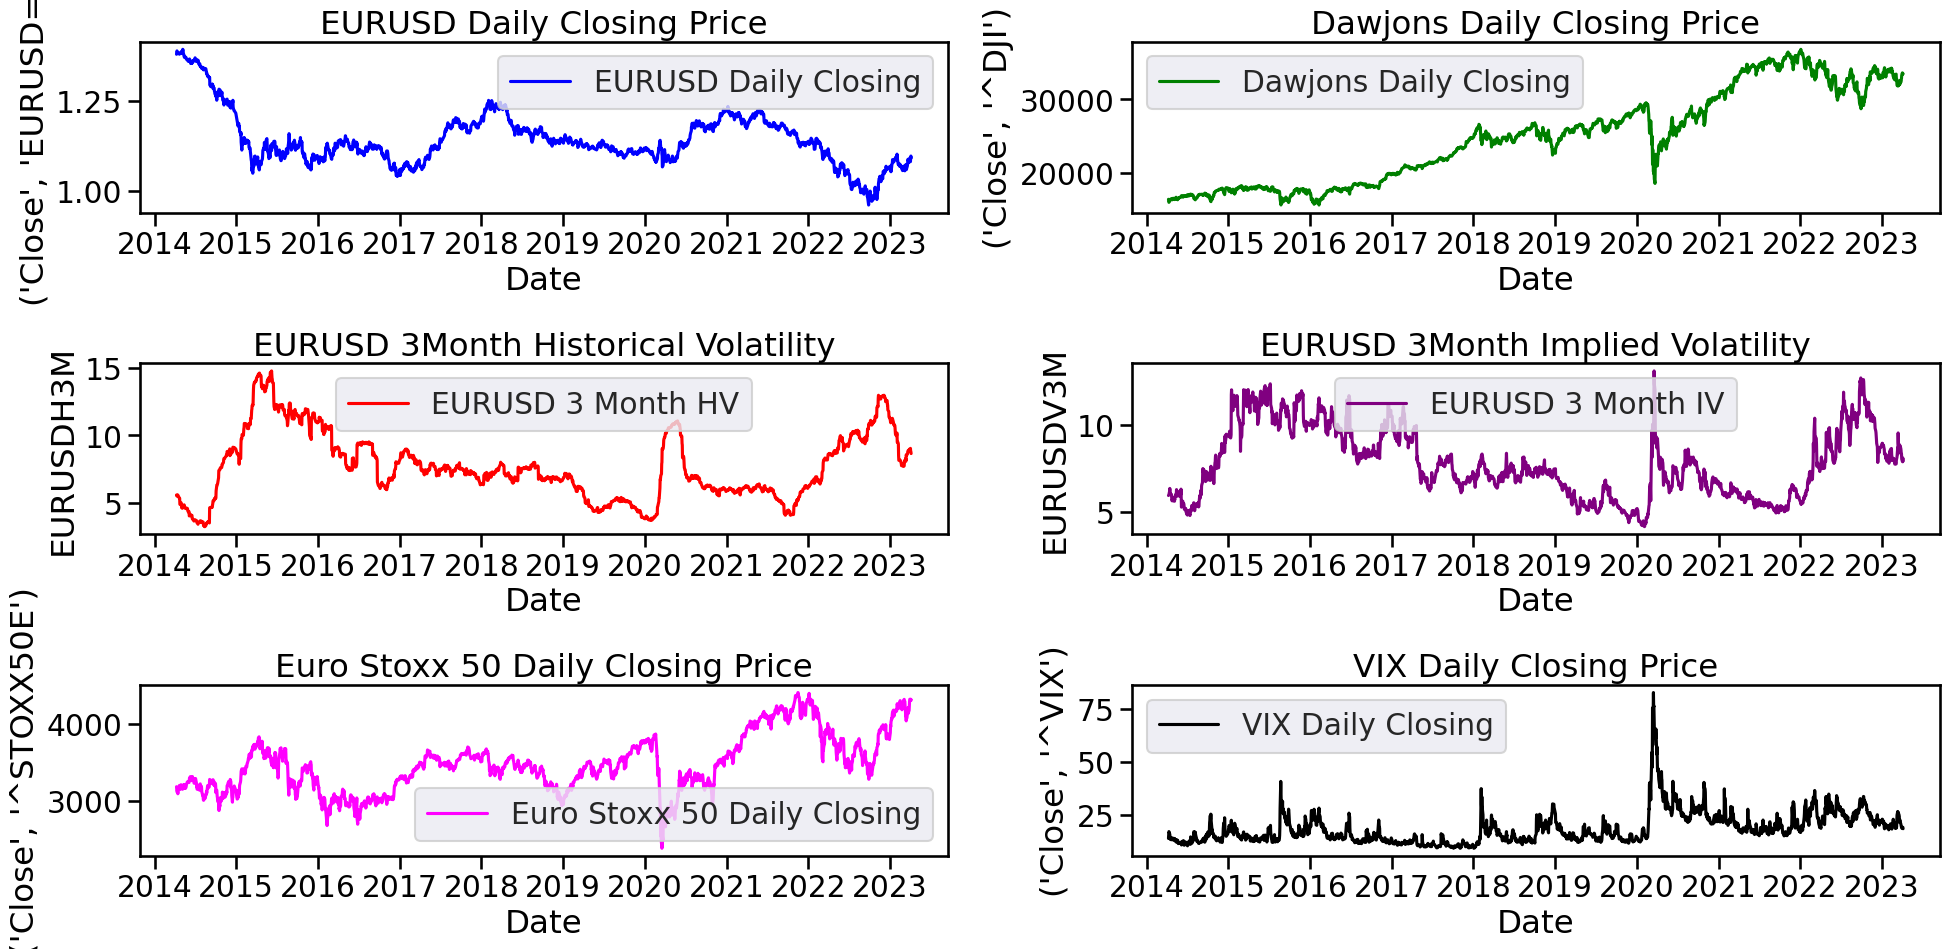

In [ ]:
sns.set_context("talk", font_scale=1.3)

# Create a 3x2 subplot layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))

# Plot the historical EUROUSD and other index
with sns.axes_style("darkgrid"):
    sns.lineplot(x=df3.index, y=df3[('Close', 'EURUSD=X')], color='blue',label='EURUSD Daily Closing', ax=axes[0, 0])
    axes[0, 0].set_title('EURUSD Daily Closing Price')

    sns.lineplot(x=df3.index, y=df3[('Close', '^DJI')], color='green', label='Dawjons Daily Closing', ax=axes[0, 1])
    axes[0, 1].set_title('Dawjons Daily Closing Price')

    sns.lineplot(x=df3.index, y=df3.EURUSDH3M, color='red', label='EURUSD 3 Month HV', ax=axes[1, 0])
    axes[1, 0].set_title('EURUSD 3Month Historical Volatility')

    sns.lineplot(x=df3.index, y=df3.EURUSDV3M, color='purple', label='EURUSD 3 Month IV', ax=axes[1, 1])
    axes[1, 1].set_title('EURUSD 3Month Implied Volatility')

    sns.lineplot(x=df3.index, y=df3[('Close', '^STOXX50E')], color='magenta', label='Euro Stoxx 50 Daily Closing', ax=axes[2, 0])
    axes[2, 0].set_title('Euro Stoxx 50 Daily Closing Price')

    sns.lineplot(x=df3.index, y=df3[('Close', '^VIX')], color='black', label='VIX Daily Closing', ax=axes[2, 1])
    axes[2, 1].set_title('VIX Daily Closing Price')


# Adjust layout spacing
plt.tight_layout()

# Show the plots
plt.show()



# # plt.tight_layout()
# plt.savefig(os.path.join(image_folder_path, 'close.png'),
#             dpi=300, bbox_inches='tight');

# 2.Types of Volatility and How They are Measured

In [ ]:
# calculate price returns as daily percentage change using `pct_change()`
df3['returns'] = 100 * df3[('Close', 'EURUSD=X')].pct_change().dropna()

In [ ]:
# calculate log returns based on above formula
df3['log_returns'] = np.log(df3[('Close', 'EURUSD=X')]/df3[('Close', 'EURUSD=X')].shift(1))

In [ ]:
df3.head()

(Close, EURUSD=X)  (Close, ^DJI)  (Close, ^STOXX50E)  \
Date                                                               
2014-04-09           1.379329   16437.179688         3182.790039   
2014-04-10           1.385502   16170.219727         3152.860107   
2014-04-11           1.388638   16026.750000         3116.540039   
2014-04-14           1.384620   16173.240234         3131.570068   
2014-04-15           1.381712   16262.559570         3091.520020   

            (Close, ^VIX)  (High, EURUSD=X)  (High, ^DJI)  (High, ^STOXX50E)  \
Date                                                                           
2014-04-09      13.820000          1.382770  16438.820312        3194.620117   
2014-04-10      15.890000          1.389960  16456.119141        3196.689941   
2014-04-11      17.030001          1.390608  16168.870117        3138.239990   
2014-04-14      16.110001          1.386290  16184.759766        3131.570068   
2014-04-15      15.610000          1.383241  16272.950195        3139.659912   

            (High, ^VIX)  (Low, EURUSD=X)   (Low, ^DJI)  ...  \
Date                                                     ...   
2014-04-09     14.940000         1.378099  16256.370117  ...   
2014-04-10     16.379999         1.383771  16153.339844  ...   
2014-04-11     17.850000         1.386559  16015.320312  ...   
2014-04-14     17.400000         1.381000  16028.290039  ...   
2014-04-15     17.500000         1.379270  16063.200195  ...   

            (Volume, ^STOXX50E)  (EMA5, )  (MOM5, )   (RSI5, )    (%K5, )  \
Date                                                                        
2014-04-09           54758800.0  1.375786 -0.000152  57.254168  77.274123   
2014-04-10           64079600.0  1.379156  0.008680  70.608304  80.035340   
2014-04-11           76465900.0  1.382401  0.016256  75.474137  90.539364   
2014-04-14           58617500.0  1.383154  0.014212  59.655171  64.057413   
2014-04-15           59163400.0  1.382667  0.007406  50.148023  28.878850   

              (%D5, )  EURUSDH3M  EURUSDV3M   returns  log_returns  
Date                                                                
2014-04-09  47.687334     5.5985     5.9300       NaN          NaN  
2014-04-10  67.922821     5.5966     5.9575  0.447520     0.004465  
2014-04-11  82.616276     5.5222     5.9775  0.226347     0.002261  
2014-04-14  78.210706     5.5990     6.1725 -0.289387    -0.002898  
2014-04-15  61.158543     5.5981     6.3375 -0.210012    -0.002102  

[5 rows x 27 columns]

In [ ]:
df3.tail()

(Close, EURUSD=X)  (Close, ^DJI)  (Close, ^STOXX50E)  \
Date                                                               
2023-03-31           1.090465   33274.148438         4315.049805   
2023-04-03           1.080334   33601.148438         4311.049805   
2023-04-04           1.091227   33402.378906         4315.319824   
2023-04-05           1.096011   33482.718750         4298.359863   
2023-04-06           1.090334   33485.289062         4309.450195   

            (Close, ^VIX)  (High, EURUSD=X)  (High, ^DJI)  (High, ^STOXX50E)  \
Date                                                                           
2023-03-31      18.700001          1.092586  33291.000000        4325.339844   
2023-04-03      18.549999          1.091572  33632.898438        4329.290039   
2023-04-04      19.000000          1.097165  33634.718750        4346.950195   
2023-04-05      19.080000          1.096924  33543.839844        4320.830078   
2023-04-06      18.400000          1.093016  33525.960938        4313.740234   

            (High, ^VIX)  (Low, EURUSD=X)   (Low, ^DJI)  ...  \
Date                                                     ...   
2023-03-31     19.430000         1.086059  32901.960938  ...   
2023-04-03     19.830000         1.078935  33245.781250  ...   
2023-04-04     20.030001         1.088388  33275.621094  ...   
2023-04-05     20.080000         1.090536  33376.269531  ...   
2023-04-06     19.879999         1.088554  33325.371094  ...   

            (Volume, ^STOXX50E)  (EMA5, )  (MOM5, )   (RSI5, )    (%K5, )  \
Date                                                                        
2023-03-31           36312200.0  1.084785  0.006959  76.145948  88.071771   
2023-04-03           29102200.0  1.083301  0.002515  48.186589  10.246177   
2023-04-04           28187400.0  1.085943  0.010519  65.306931  67.425649   
2023-04-05           29791800.0  1.089299  0.012058  70.633790  93.668097   
2023-04-06           28509400.0  1.089644  0.005971  57.532015  62.530407   

              (%D5, )  EURUSDH3M  EURUSDV3M   returns  log_returns  
Date                                                                
2023-03-31  68.769517     8.9963     8.0250  0.562679     0.005611  
2023-04-03  53.048904     9.0381     7.8875 -0.929086    -0.009334  
2023-04-04  55.247866     8.8088     7.8700  1.008298     0.010032  
2023-04-05  57.113308     8.7889     8.0900  0.438405     0.004374  
2023-04-06  74.541384     8.6563     7.9075 -0.517914    -0.005193  

[5 rows x 27 columns]

In [ ]:
# Drop the 1st row of the data
df3.dropna(inplace=True)

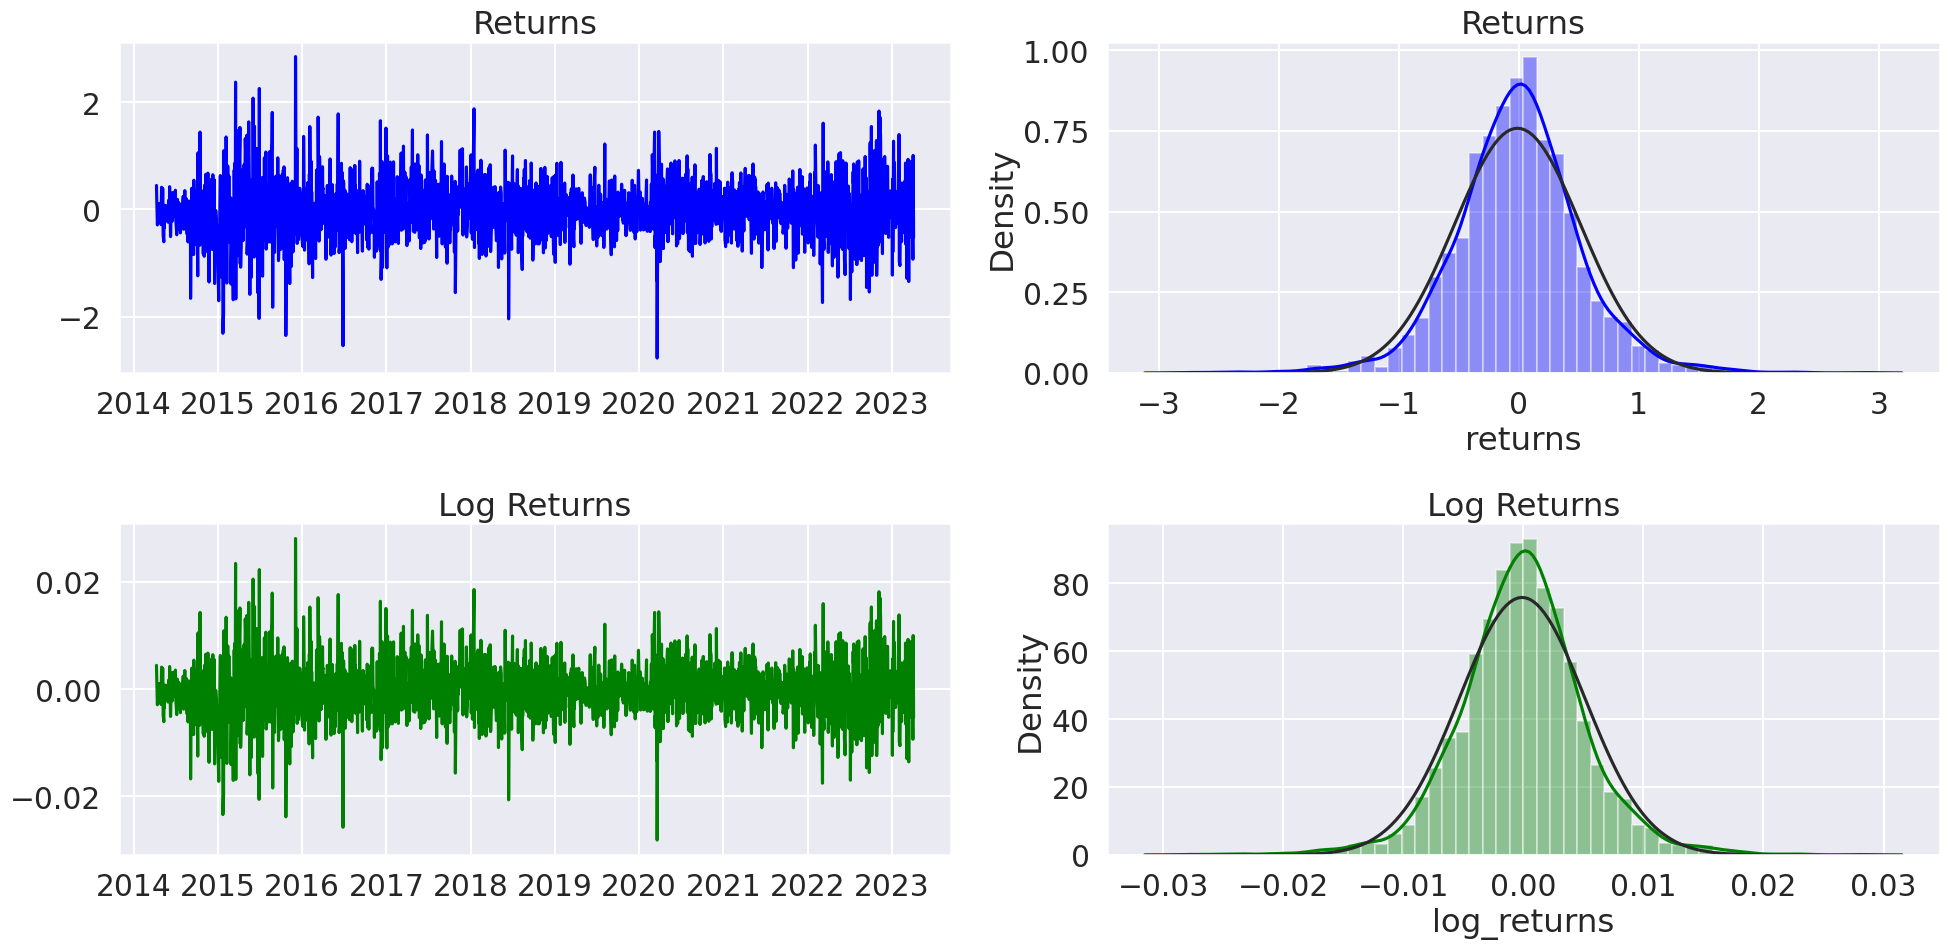

In [ ]:
# Show the Returns and logreturns
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

    axes[0][0].plot(df3.returns, color='blue')
    axes[0][0].set_title('Returns')

    sns.distplot(df3.returns, norm_hist=True, fit=stats.norm, color='blue',
                bins=50, ax=axes[0][1])
    axes[0][1].set_title('Returns')

    axes[1][0].plot(df3.log_returns, color='green')
    axes[1][0].set_title('Log Returns')

    sns.distplot(df3.log_returns, norm_hist=True, fit=stats.norm, color='green',
                bins=50, ax=axes[1][1])
    axes[1][1].set_title('Log Returns')
    plt.tight_layout()
    # plt.savefig(os.path.join(image_folder_path, 'returns_logreturns.png'),
    #             dpi=300, bbox_inches='tight')
    fig.show();

In [ ]:
# the function to calculate the real Volatility based on the formula
def realized_volatility_daily(series_log_return):
    n = len(series_log_return)
    return np.sqrt(np.sum(series_log_return**2)/(n - 1))

## 2.1 Interval Window Selection

In [ ]:
intervals = [5, 22, 66, 132, 252]
vols_df = {}

# loop over different intervals
for i in intervals:
    # daily log return for the interval
    vols = df3.log_returns.rolling(window=i)\
                         .apply(realized_volatility_daily).values

    vols_df[i] = vols

# from dictionary to pandas dataframe
vols_df = pd.DataFrame(vols_df, columns=intervals, index=df3.index)

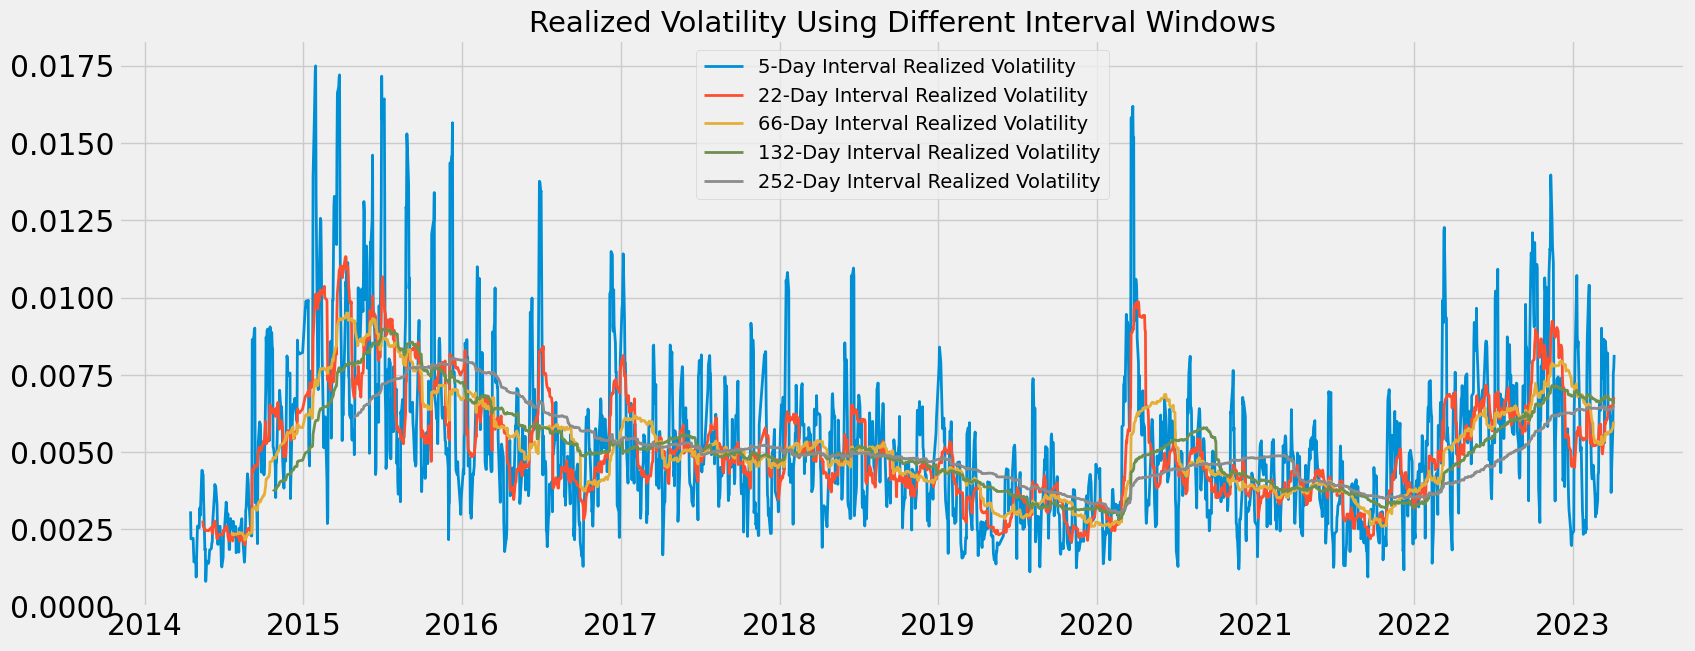

In [ ]:
# plot all the different interval realized volatility
plt.style.use(['fivethirtyeight'])

fig, ax = plt.subplots(figsize=(18,7))

for i in intervals:
    if i == 7:
        alpha = 0.5
        lw = 1
    else:
        alpha = 1.0
        lw = 2
    ax.plot(vols_df[i], label=f'{i}-Day Interval Realized Volatility',
            alpha=alpha, lw=lw)

ax.set_title('Realized Volatility Using Different Interval Windows', fontsize=21)

plt.legend(loc='best', prop={'size': 14})
# plt.savefig(os.path.join(image_folder_path, 'diff_intervals.png'),
#             dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
INTERVAL_WINDOW = 66
n_future = 1

df3['vol_current'] = df3.log_returns.rolling(window=INTERVAL_WINDOW)\
                                   .apply(realized_volatility_daily)
# current volatility shifted by 1 day as our target
df3['vol_future'] = df3.log_returns.shift(-n_future)\
                                 .rolling(window=INTERVAL_WINDOW)\
                                 .apply(realized_volatility_daily)

# 3.Exploratory Data Analysis

## 3.1 Data Distribution Analysis

In [ ]:
# drop all NaN
df3.dropna(inplace=True)

In [ ]:
df3.describe()

(Close, EURUSD=X)  (Close, ^DJI)  (Close, ^STOXX50E)  (Close, ^VIX)  \
count        2121.000000    2121.000000         2121.000000    2121.000000   
mean            1.134315   25164.827714         3480.948802      18.691169   
std             0.063688    6168.896417          369.198597       7.673224   
min             0.959619   15660.179688         2385.820068       9.140000   
25%             1.094271   18392.460938         3226.080078      13.280000   
50%             1.127752   25286.490234         3455.919922      16.690001   
75%             1.176700   30483.130859         3674.939941      22.170000   
max             1.353217   36799.648438         4401.490234      82.690002   

       (High, EURUSD=X)  (High, ^DJI)  (High, ^STOXX50E)  (High, ^VIX)  \
count       2121.000000   2121.000000        2121.000000   2121.000000   
mean           1.138038  25303.030720        3504.724815     19.990674   
std            0.063261   6210.642157         366.819795      8.507089   
min            0.967006  15897.820312        2461.570068      9.310000   
25%            1.098418  18430.050781        3250.810059     14.070000   
50%            1.131875  25401.189453        3476.929932     17.840000   
75%            1.179357  30777.919922        3696.189941     23.719999   
max            1.354920  36952.648438        4415.229980     85.470001   

       (Low, EURUSD=X)   (Low, ^DJI)  ...     (MOM5, )     (RSI5, )  \
count      2121.000000   2121.000000  ...  2121.000000  2121.000000   
mean          1.130450  25011.756532  ...    -0.000701    48.155110   
std           0.063918   6125.083019  ...     0.012649    19.215212   
min           0.954016  15370.330078  ...    -0.053331     2.844754   
25%           1.090251  18295.480469  ...    -0.007958    33.781258   
50%           1.123734  25082.720703  ...    -0.000900    47.920063   
75%           1.172897  30226.900391  ...     0.006895    62.505054   
max           1.351470  36636.000000  ...     0.052011    95.763543   

           (%K5, )      (%D5, )    EURUSDH3M    EURUSDV3M      returns  \
count  2121.000000  2121.000000  2121.000000  2121.000000  2121.000000   
mean     48.544173    48.404542     7.798037     7.848041    -0.008476   
std      25.708360    19.439598     2.415358     1.992071     0.532170   
min      -2.189879     6.485510     3.262500     4.137500    -2.775173   
25%      26.351098    32.360478     6.092300     6.302500    -0.319410   
50%      48.347432    48.174863     7.390000     7.490000    -0.005783   
75%      70.331775    64.545161     9.330100     9.455000     0.291338   
max     102.943150    90.773881    14.749900    13.095000     2.854517   

       log_returns  vol_current   vol_future  
count  2121.000000  2121.000000  2121.000000  
mean     -0.000099     0.005083     0.005085  
std       0.005323     0.001569     0.001568  
min      -0.028144     0.002152     0.002152  
25%      -0.003199     0.003905     0.003910  
50%      -0.000058     0.004952     0.004954  
75%       0.002909     0.006081     0.006081  
max       0.028145     0.009500     0.009500  

[8 rows x 29 columns]

## 3.1 Time Series Analysis

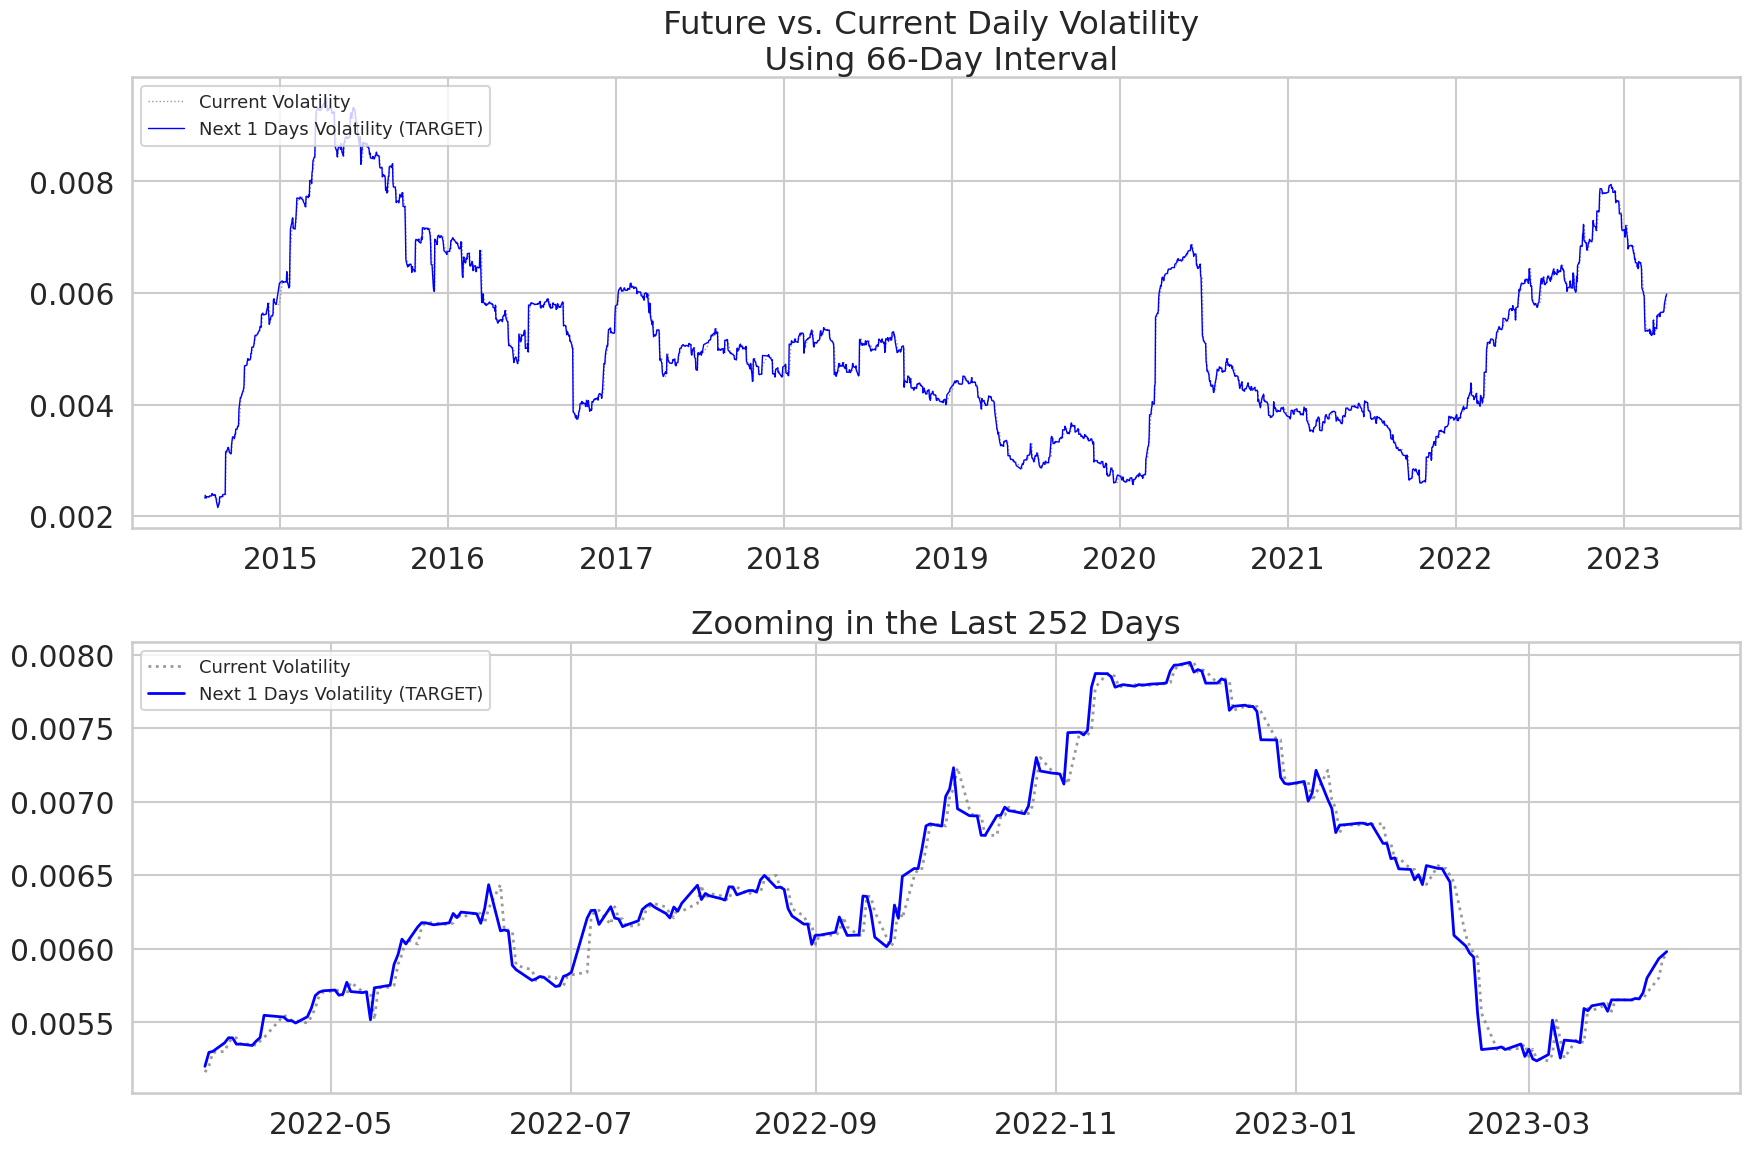

In [ ]:
n_zoom = 252
sns.set_context("talk", font_scale=1.3)


with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,12))

    ax1.plot(df3.vol_current, alpha=.8, lw=1, color='gray', ls=':',
            label='Current Volatility')
    ax1.plot(df3.vol_future, lw=1, color='blue',
            label=f'Next {n_future} Days Volatility (TARGET)')

    ax2.plot(df3.vol_current[-n_zoom:], alpha=.8, lw=2, color='gray', ls=':',
            label='Current Volatility')
    ax2.plot(df3.vol_future[-n_zoom:], lw=2, color='blue',
            label=f'Next {n_future} Days Volatility (TARGET)')

    ax1.title.set_text(f'Future vs. Current Daily Volatility \n Using {INTERVAL_WINDOW}-Day Interval')
    ax2.title.set_text(f'Zooming in the Last {n_zoom} Days')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    plt.tight_layout()
    # plt.savefig(os.path.join(image_folder_path, 'daily_vol.jpg'),
    #             dpi=300, bbox_inches='tight')
    plt.show();

## 3.3 Correlation Analysis

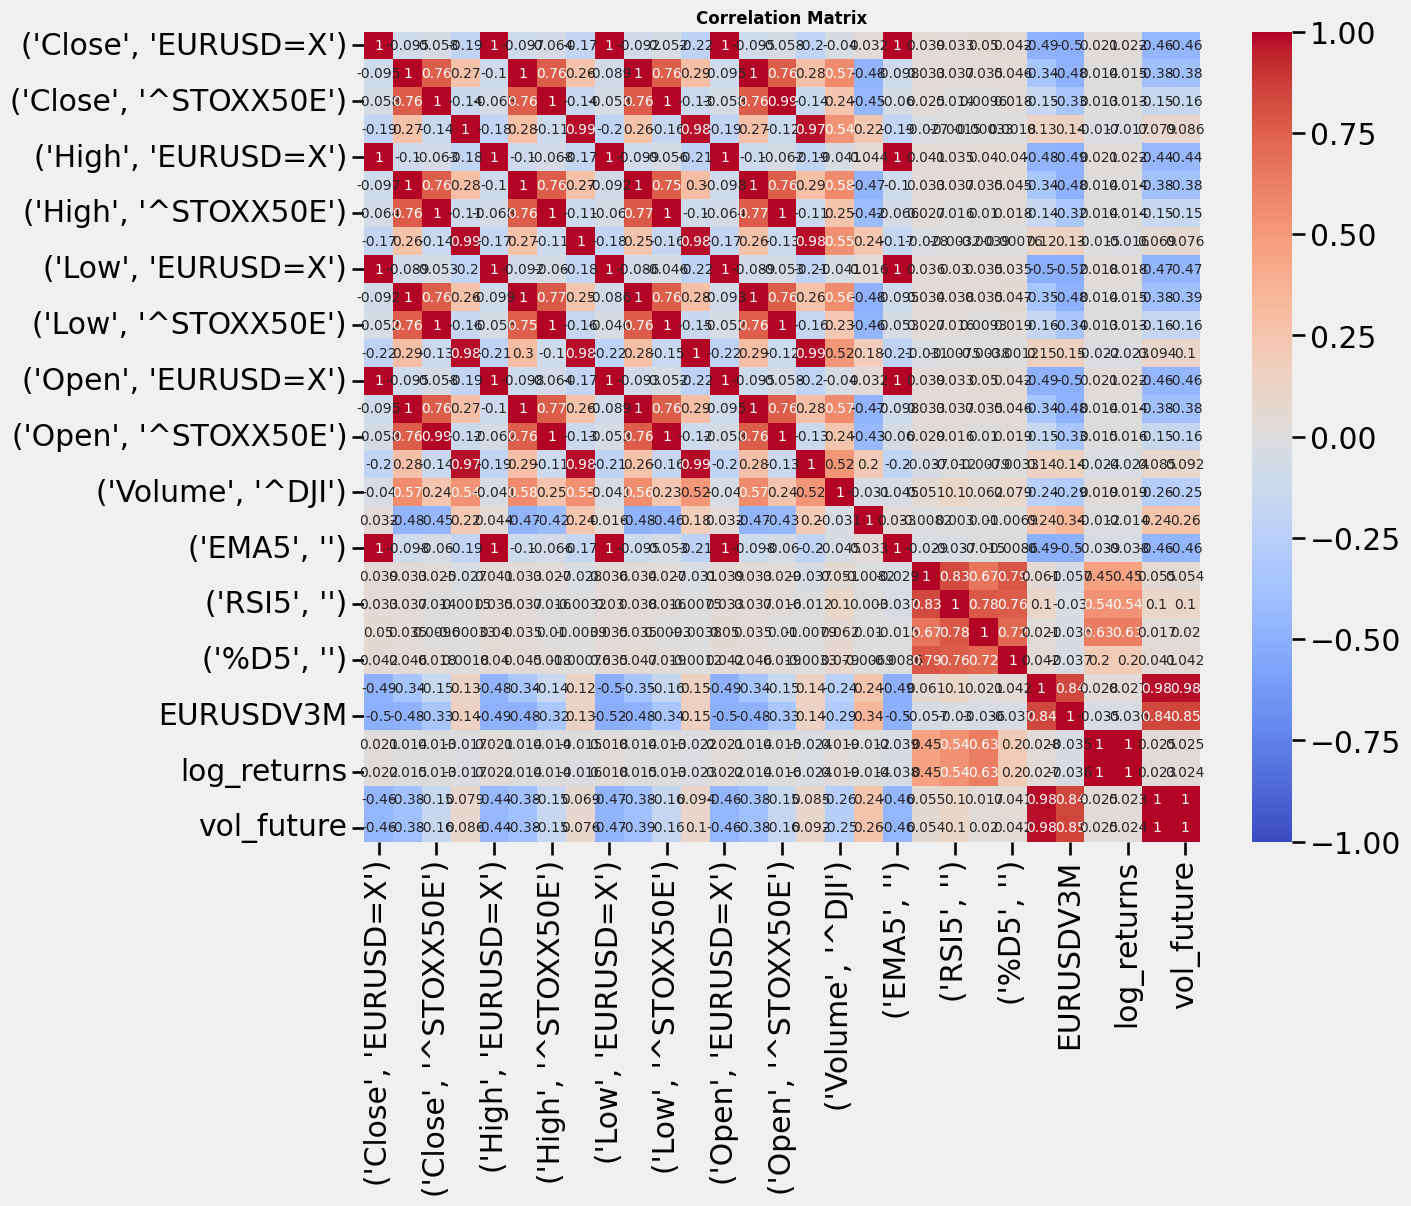

In [ ]:
# Compute the correlation matrix
correlation_matrix = df3.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"size": 10})  # Setting the annotation font size
plt.title('Correlation Matrix', fontsize=12, fontweight='bold')
plt.show()


## 3.1 Daily Volatility Grouped by Month

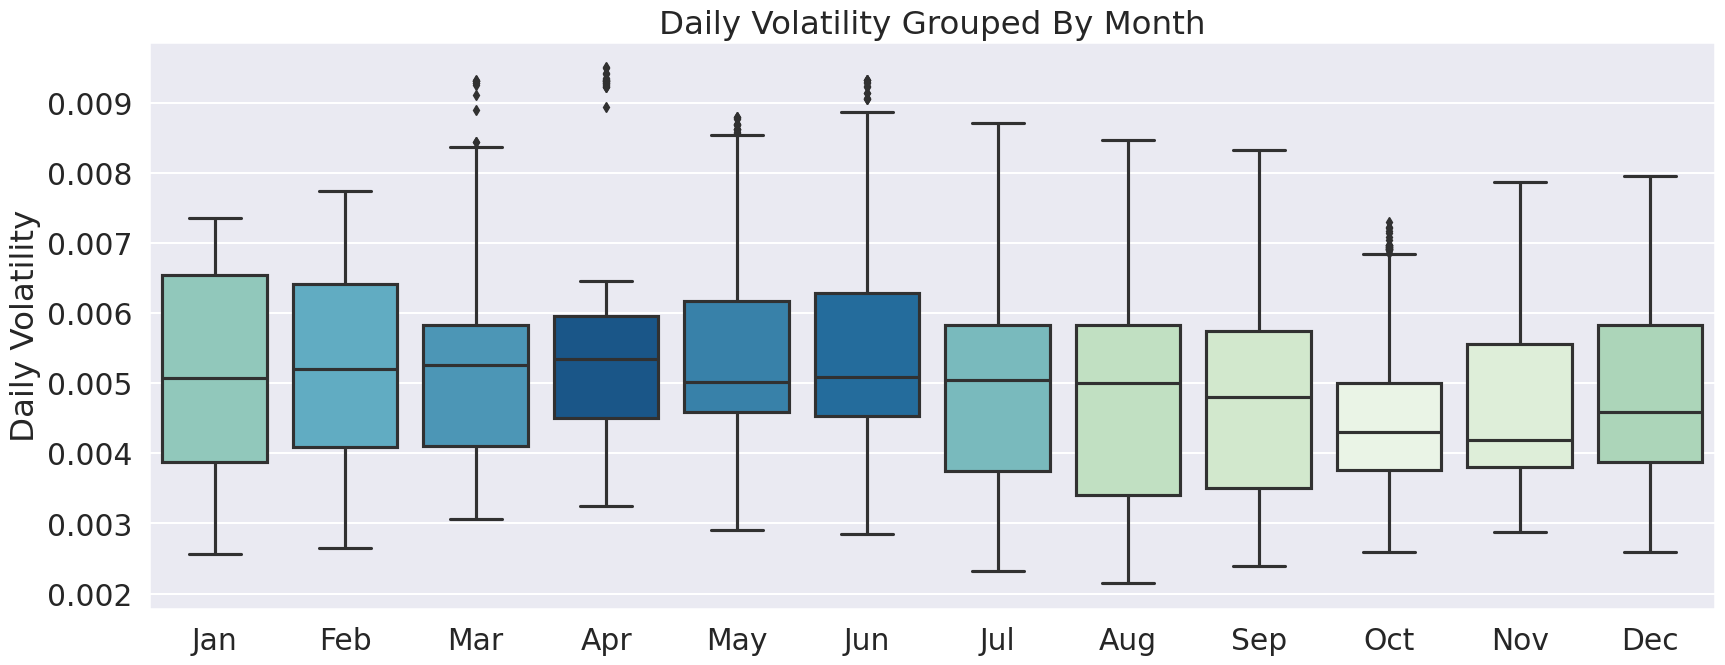

In [ ]:
ordered_months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun',
                  'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

# group vol_current by month and calculate the average
data = df3.groupby(by=[df3.index.month_name()]).vol_current.mean()

# abbreviate month name
data.index = [x[:3] for x in data.index]

# select palette
pal = sns.color_palette("GnBu", len(data))

# sort month by average vol_current
rank = data.argsort().argsort().reindex(ordered_months)

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,7))

    sns.boxplot(x=[x[:3] for x in df3.index.month_name()],
                y=df3.vol_current,
                palette=np.array(pal)[rank],
                order=ordered_months)
    ax.set(xlabel='',
           ylabel='Daily Volatility',
           title='Daily Volatility Grouped By Month')
    # plt.savefig(os.path.join(image_folder_path, "vol_by_month.png"),
    #             dpi=300, bbox_inches='tight')
    plt.show()

## 3.2 Daily Volatility Grouped by Year

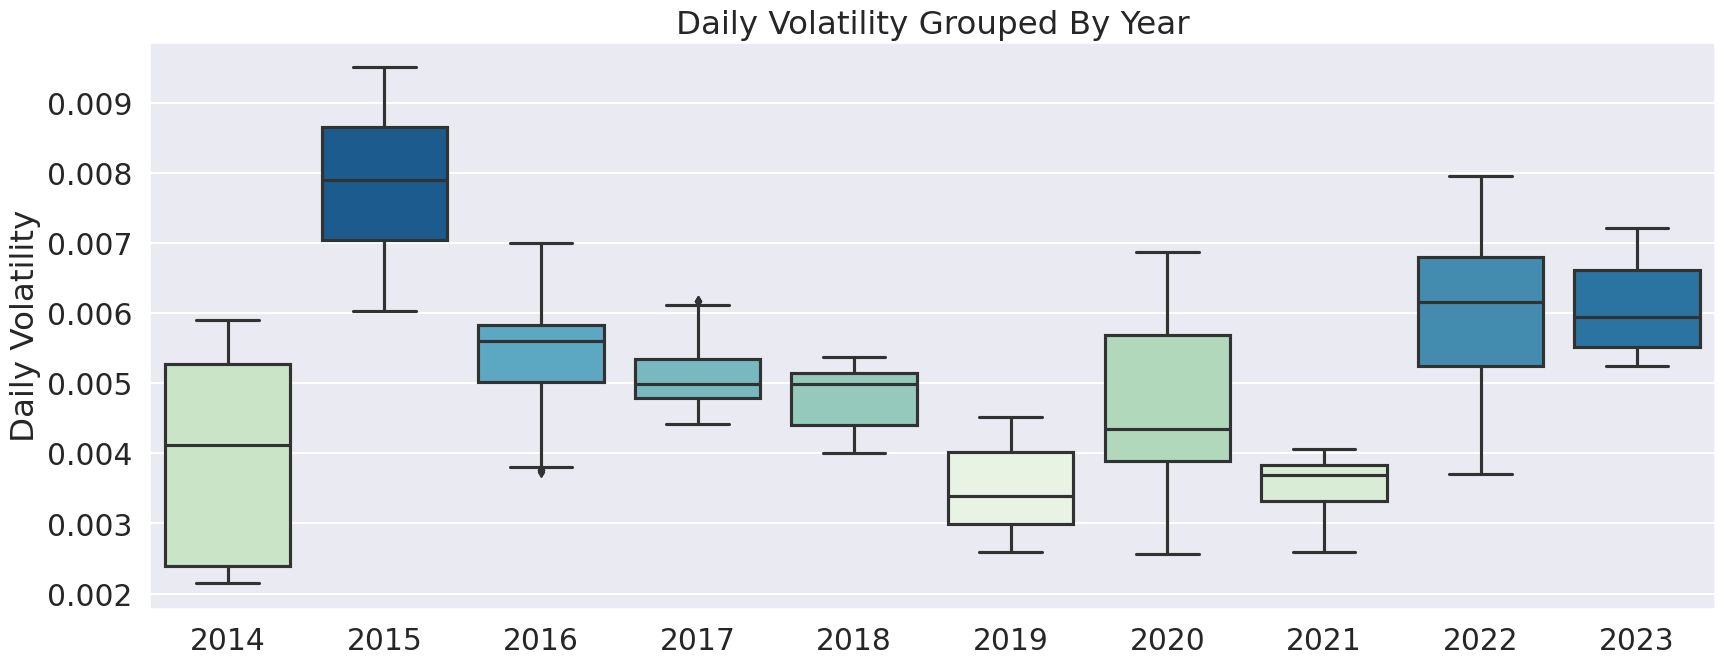

In [ ]:
data = df3.groupby(by=[df3.index.year]).vol_current.mean()

# select palette
pal = sns.color_palette("GnBu", len(data))

# sort year by average vol_current
rank = data.argsort().argsort()

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(18,7))

    sns.boxplot(x=df3.index.year,
                y=df3.vol_current,
                palette=np.array(pal)[rank])
    ax.set(xlabel='',
           ylabel='Daily Volatility',
           title='Daily Volatility Grouped By Year')
    # plt.savefig(os.path.join(image_folder_path, "vol_by_year.png"),
    #             dpi=300, bbox_inches='tight')
    plt.show()

## 3.3 Daily Volatility Distribution

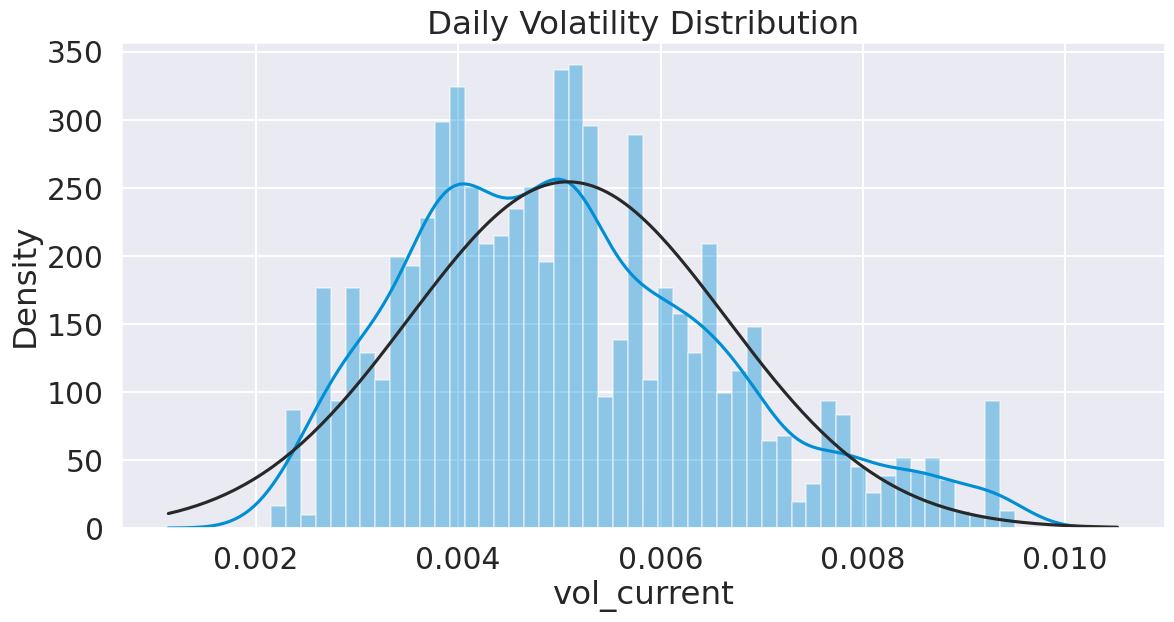

In [ ]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12,6))
    sns.distplot(df3.vol_current, norm_hist=True, fit=stats.norm,
                bins=50, ax=ax)
    plt.title('Daily Volatility Distribution')
    plt.show();

# 4.Train Validation Test Splits and Data preprocessing

## 4.1 Train Validation Test Splits

In [ ]:
# Split into train and test sets 70% train, 20% validation, 10% test
train_size = int(len(df3) * 0.7)
val_size = int(len(df3) * 0.2)
test_size = len(df3) - train_size - val_size

# the time stamp for the split
split_1 = len(df3) - (val_size + test_size)
split_2 = len(df3) - test_size

# allocte the index for the split
train_idx = df3.index[:split_1]
val_idx = df3.index[split_1:split_2]
test_idx = df3.index[split_2:]

In [ ]:
print(f'TRAINING \tFrom: {train_idx[0]} \tto: {train_idx[-1]} \t{len(train_idx)} days')
print(f'VALIDATION \tFrom: {val_idx[0]} \tto: {val_idx[-1]} \t{len(val_idx)} days')
print(f'TEST \t\tFrom: {test_idx[0]} \tto: {test_idx[-1]} \t{len(test_idx)} days')

TRAINING 	From: 2014-07-21 00:00:00 	to: 2020-09-09 00:00:00 	1484 days
VALIDATION 	From: 2020-09-10 00:00:00 	to: 2022-05-25 00:00:00 	424 days
TEST 		From: 2022-05-27 00:00:00 	to: 2023-04-05 00:00:00 	213 days


In [ ]:
# Target Train Val Test Split
y_train = df3.vol_future[train_idx]
y_val = df3.vol_future[val_idx]
y_test = df3.vol_future[test_idx]

In [ ]:
# Feature Train Val Test Split
x_train = df3.vol_current[train_idx]
x_val = df3.vol_current[val_idx]
x_test = df3.vol_current[test_idx]

In [ ]:
# Train Test Val Split
lr_train = df3.log_returns[train_idx]
lr_val = df3.log_returns[val_idx]
lr_test = df3.log_returns[test_idx]

In [ ]:
y_train.describe()

count    1484.000000
mean        0.005202
std         0.001614
min         0.002152
25%         0.004175
50%         0.005035
75%         0.006061
max         0.009500
Name: vol_future, dtype: float64

In [ ]:
x_train.describe()

count    1484.000000
mean        0.005201
std         0.001616
min         0.002152
25%         0.004172
50%         0.005035
75%         0.006061
max         0.009500
Name: vol_current, dtype: float64

## 4.2 Data Preprocessing

### 4.2.1 Feature Normalization

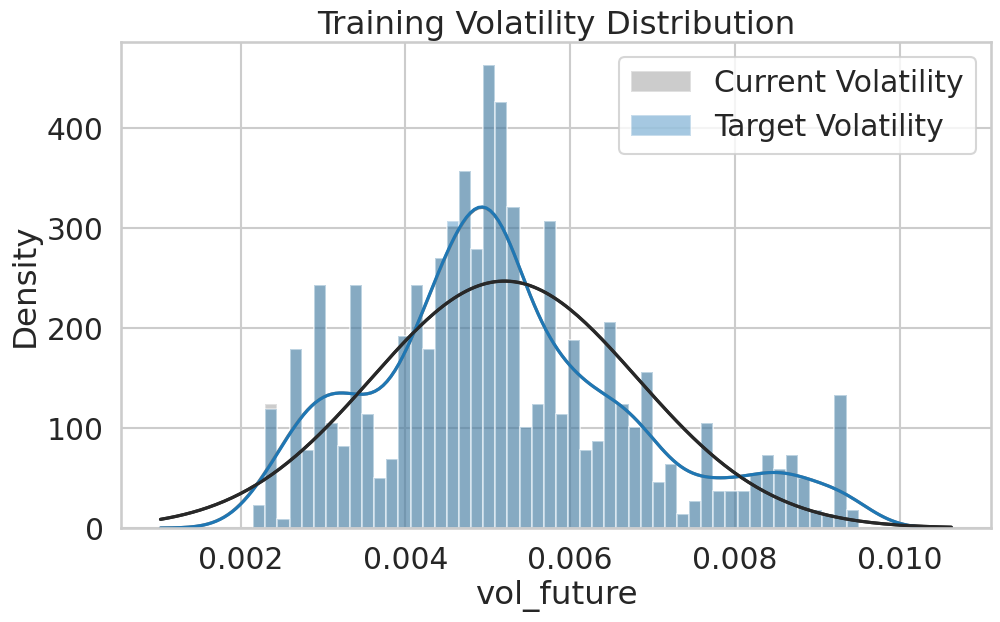

In [ ]:
# Plot Volatility dustrubution
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(x_train, norm_hist=True, fit=stats.norm,
                 color='gray',
                 bins=50, ax=ax, label='Current Volatility')
    sns.distplot(y_train, norm_hist=True, fit=stats.norm,
                 color='tab:blue',
                 bins=50, ax=ax, label='Target Volatility')
    plt.title('Training Volatility Distribution')
    plt.legend()
    # plt.savefig(os.path.join(image_folder_path, "vol_dist.png"),
    #             dpi=300, bbox_inches='tight')
    plt.show();

In [ ]:
def transform_volatility_to_scaler(scaler, tf_series):
    '''
    Transform a series to a fitted scaler
    '''
    idx = tf_series.index
    output = pd.Series(scaler.transform(tf_series.values.reshape(-1,1))[:,0],
                       index=idx)
    return output

In [ ]:
# Using MinMax Scaler
scaler_vol = MinMaxScaler()

# fit scaler
scaler_vol = scaler_vol.fit(x_train.values.reshape(-1,1))

In [ ]:
# Scale the train val test
x_train_scaled = transform_volatility_to_scaler(scaler_vol, x_train)
y_train_scaled = transform_volatility_to_scaler(scaler_vol, y_train)


x_val_scaled = transform_volatility_to_scaler(scaler_vol, x_val)
y_val_scaled = transform_volatility_to_scaler(scaler_vol, y_val)


x_test_scaled = transform_volatility_to_scaler(scaler_vol, x_test)
y_test_scaled = transform_volatility_to_scaler(scaler_vol, y_test)

In [ ]:
x_train.head(10)

Date
2014-07-21    0.002386
2014-07-22    0.002321
2014-07-23    0.002367
2014-07-24    0.002340
2014-07-25    0.002326
2014-07-28    0.002349
2014-07-29    0.002347
2014-07-30    0.002343
2014-07-31    0.002343
2014-08-04    0.002362
Name: vol_current, dtype: float64

In [ ]:
y_train.head(10)

Date
2014-07-21    0.002321
2014-07-22    0.002367
2014-07-23    0.002340
2014-07-24    0.002326
2014-07-25    0.002349
2014-07-28    0.002347
2014-07-29    0.002343
2014-07-30    0.002343
2014-07-31    0.002362
2014-08-04    0.002360
Name: vol_future, dtype: float64

In [ ]:
x_train_scaled.head(10)

Date
2014-07-21    0.031824
2014-07-22    0.023020
2014-07-23    0.029277
2014-07-24    0.025605
2014-07-25    0.023630
2014-07-28    0.026743
2014-07-29    0.026464
2014-07-30    0.025994
2014-07-31    0.026029
2014-08-04    0.028514
dtype: float64

In [ ]:
y_train_scaled.head(10)

Date
2014-07-21    0.023020
2014-07-22    0.029277
2014-07-23    0.025605
2014-07-24    0.023630
2014-07-25    0.026743
2014-07-28    0.026464
2014-07-29    0.025994
2014-07-30    0.026029
2014-07-31    0.028514
2014-08-04    0.028249
dtype: float64

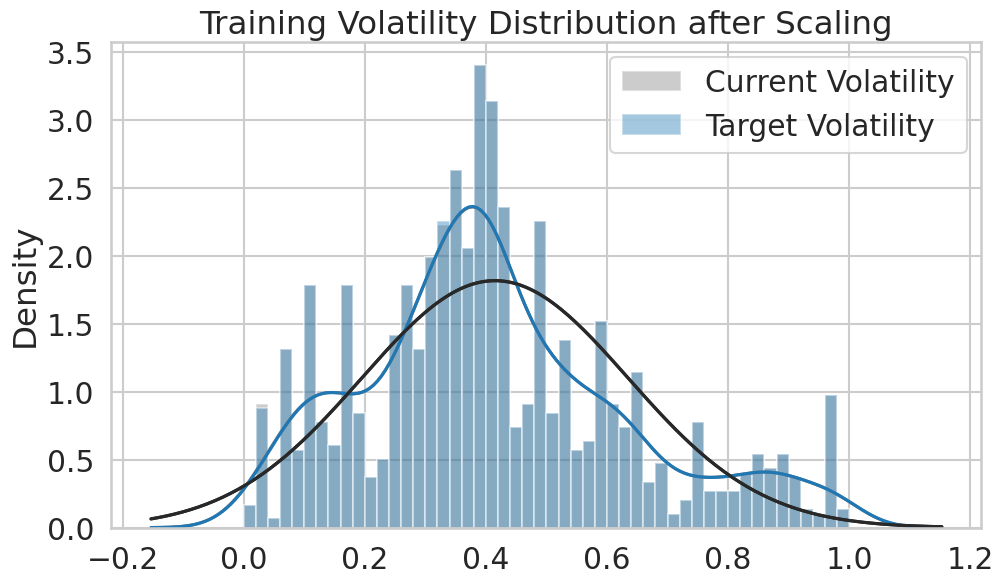

In [ ]:
# Plot Volatility dustrubution after scaling
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.distplot(x_train_scaled, norm_hist=True, fit=stats.norm,
                 color='gray',
                 bins=50, ax=ax, label='Current Volatility')
    sns.distplot(y_train_scaled, norm_hist=True, fit=stats.norm,
                 color='tab:blue',
                 bins=50, ax=ax, label='Target Volatility')
    plt.title('Training Volatility Distribution after Scaling')
    plt.legend()
    # plt.savefig(os.path.join(image_folder_path, "vol_dist.png"),
    #             dpi=300, bbox_inches='tight')
    plt.show();

### 4.2.2 Train-Validation-Test Visualization

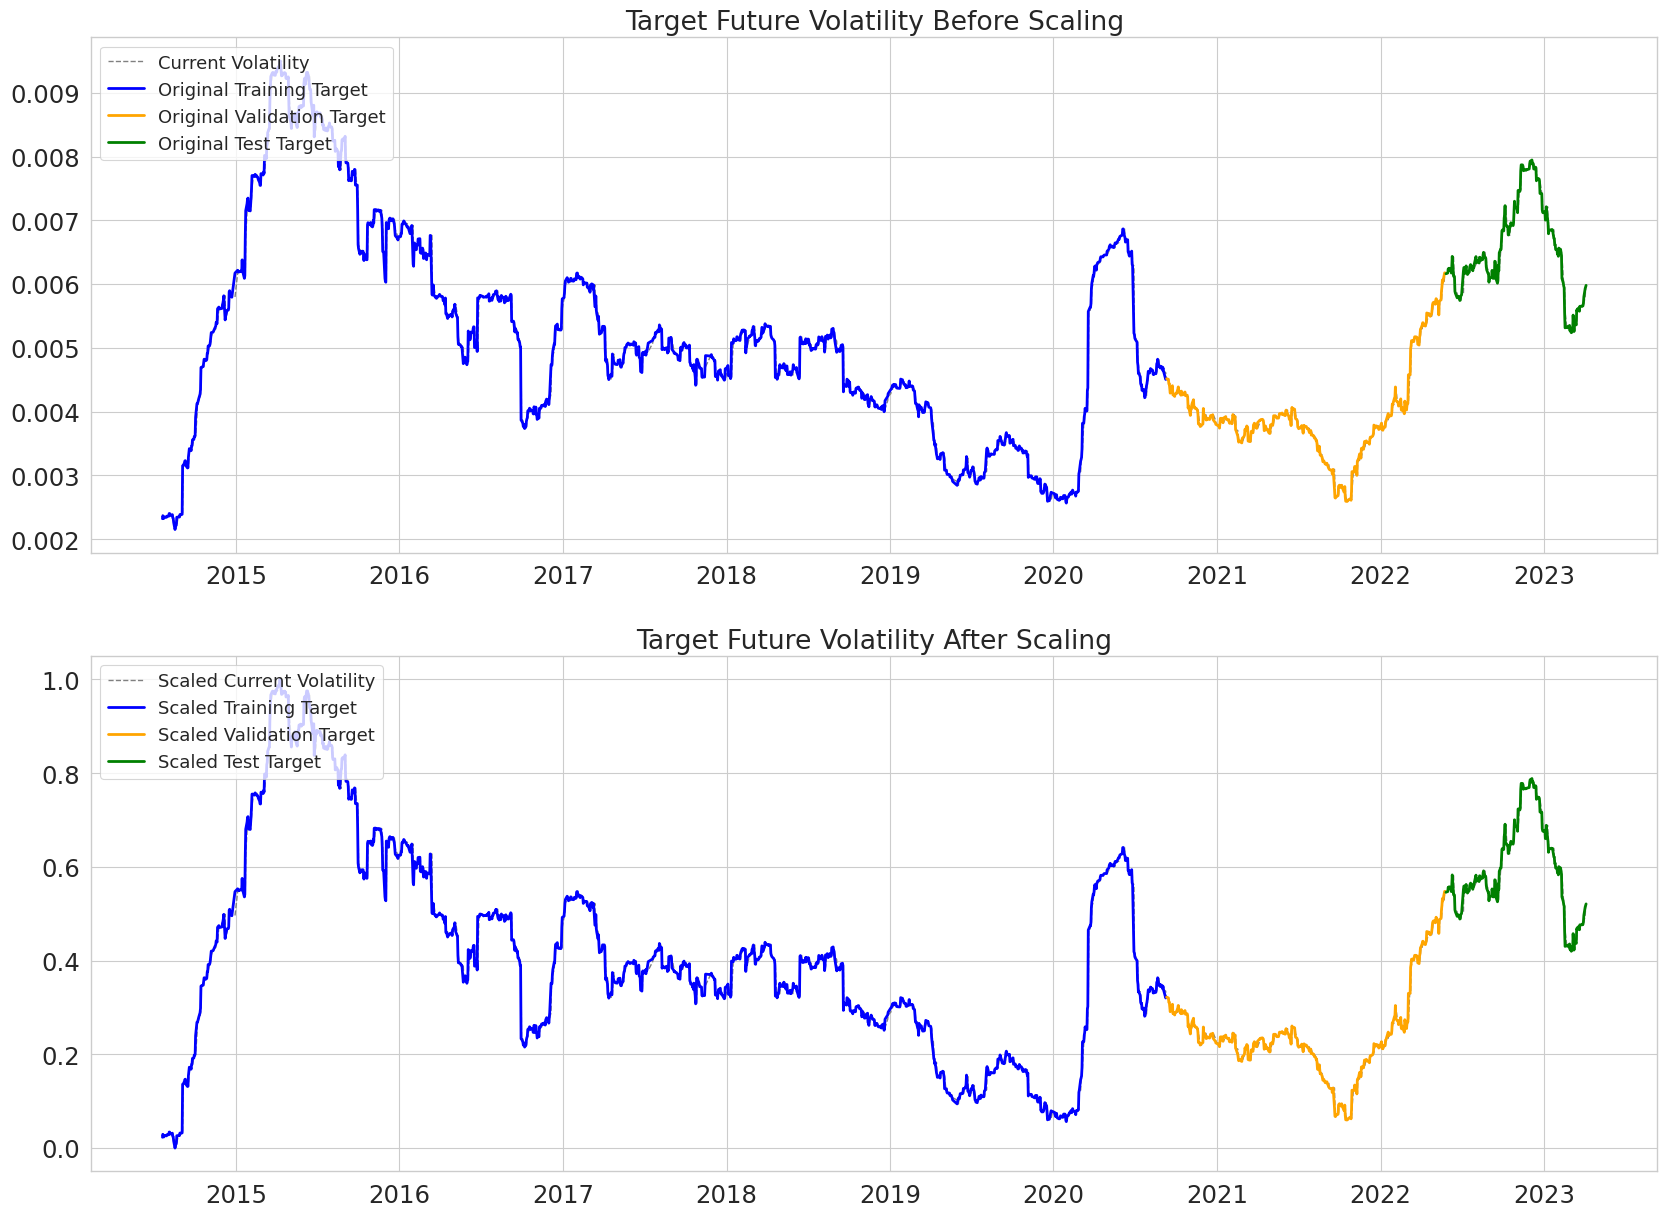

In [ ]:
sns.set_context("paper", font_scale=2)

# Plot train val test vol_future before and after scaling
with sns.axes_style("whitegrid"):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18,14))

    ax1.plot(df3.vol_current, lw=1, color='gray', ls='--',
                label='Current Volatility')
    ax1.plot(y_train, color='blue', label='Original Training Target', lw=2)
    ax1.plot(y_val, color='orange', label='Original Validation Target', lw=2)
    ax1.plot(y_test, color='green', label='Original Test Target', lw=2)

    ax1.title.set_text('Target Future Volatility Before Scaling')

    ax2.plot(transform_volatility_to_scaler(scaler_vol, df3.vol_current),
                lw=1, color='gray', ls='--',
                label='Scaled Current Volatility')
    ax2.plot(y_train_scaled, color='blue', label='Scaled Training Target', lw=2)
    ax2.plot(y_val_scaled, color='orange', label='Scaled Validation Target', lw=2)
    ax2.plot(y_test_scaled, color='green', label='Scaled Test Target', lw=2)

    ax2.title.set_text('Target Future Volatility After Scaling')

    ax1.legend(loc='upper left', prop={'size': 13}, frameon=True)
    ax2.legend(loc='upper left', prop={'size': 13}, frameon=True)
    # plt.savefig(os.path.join(image_folder_path, 'train_val_test_org_scled.png'),
    #             dpi=300, bbox_inches='tight')
    plt.show();

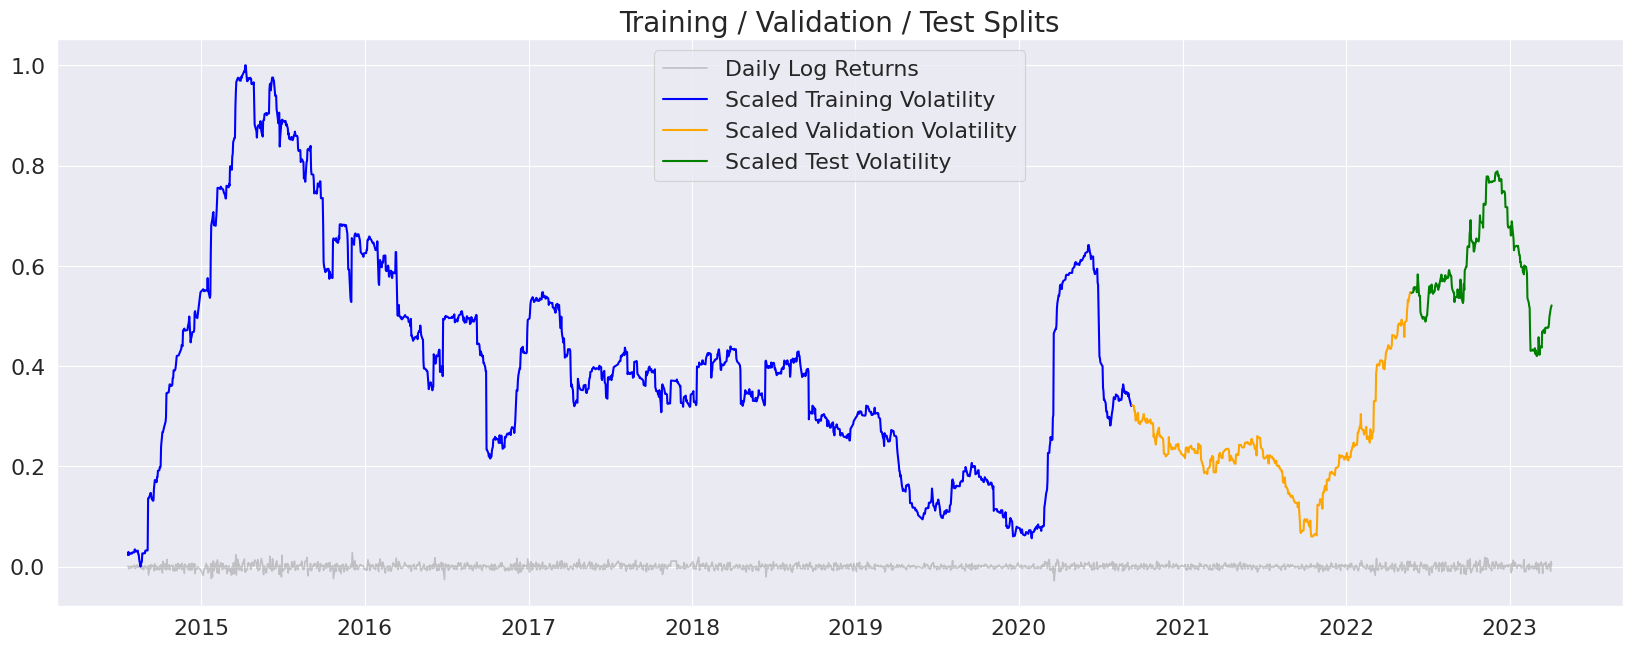

In [ ]:
sns.set_context("paper", font_scale=1.8)
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(18,7))

    plt.plot(df3.log_returns, color='gray', label='Daily Log Returns', alpha=0.4)

    plt.plot(y_train_scaled, color='blue',
             label='Scaled Training Volatility', lw=1.5)
    plt.plot(y_val_scaled, color='orange',
             label='Scaled Validation Volatility', lw=1.5)
    plt.plot(y_test_scaled, color='green',
             label='Scaled Test Volatility', lw=1.5)

    plt.plot()
    plt.title('Training / Validation / Test Splits', fontsize=20)
    plt.legend(frameon=True)
    # plt.savefig(os.path.join(image_folder_path, 'train_val_test.png'),
    #             dpi=300, bbox_inches='tight')
    plt.show();

# 5.MODELING

## 5.1 Performance Metrics

In [ ]:
# root mean square percentage error funtion
def RMSPE(y_true, y_pred):
    output = np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))
    return output

In [ ]:
# RMSE funtion
def RMSE(y_true, y_pred):

    output = np.sqrt(mse(y_true, y_pred))
    return output

In [ ]:
# start a dataframe for monitoring and comparing model performance
perf_df = pd.DataFrame(columns=['Model', 'Validation RMSPE', 'Validation RMSE'])

In [ ]:
# a function that records model name, rmse, and rmpse into perf_df for simple comparison in the future
def log_perf(y_true, y_pred, model_name):
    perf_df.loc[len(perf_df.index)] = [model_name,
                                       RMSPE(y_true, y_pred),
                                       RMSE(y_true, y_pred)]
    return perf_df

In [ ]:
# plotting model predictions vs. target values
def viz_model(y_true, y_pred, model_name):
    sns.set_context("paper", font_scale=1.7)
    plt.rcParams["axes.grid"] = False

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(18,7))
        plt.plot(x_val_scaled, color='gray',  ls=':',
                label=f"Scaled Current Daily Volatility")

        plt.plot(y_true, color='blue', lw=2,
                label=f"Target Volatility")
        plt.plot(y_pred, color='orange', lw=2.5,
                label=f'Forecasted Volatility')

        # plt.plot(lr_val, color='gray', alpha=0.4,
        #         label='Daily Log Returns')

        plt.title(f'{model_name} \non Validation Data')
        plt.legend(loc='best', frameon=True)

## 5.2 Baseline Models

### 5.2.1 Mean Baseline

In [ ]:
# calculate the mean of scaled training data
mean_train_vol = x_train_scaled.mean()
mean_train_vol

0.4148953924344745

In [ ]:
# create a series of predictions for baseline model on validation set
baseline_preds = np.ones(len(val_idx)) * mean_train_vol
baseline_preds = pd.Series(baseline_preds, index=lr_val.index)

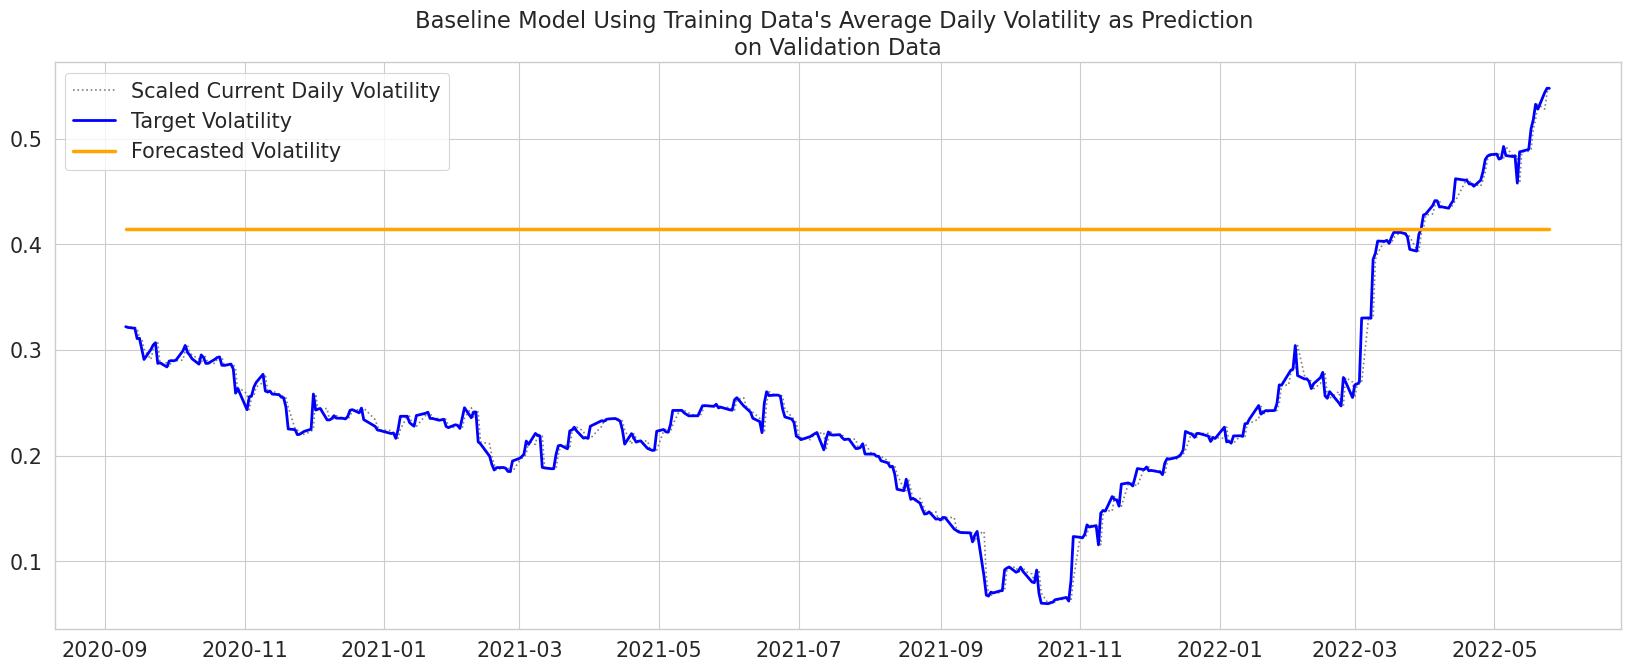

In [ ]:
viz_model(y_val_scaled, baseline_preds,
          f"Baseline Model Using Training Data's Average Daily Volatility as Prediction")
# plt.savefig(os.path.join(image_folder_path, 'baseline.jpg'), dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
log_perf(y_val_scaled, baseline_preds, 'Mean Baseline')

Model  Validation RMSPE  Validation RMSE
0  Mean Baseline          1.534467         0.196596

### 5.2.2 Linear Regression Model

In [ ]:
# Import required libraries
from sklearn.linear_model import LinearRegression

In [ ]:
# Target Train Val Test Split
y_train_1 = df3.vol_future[train_idx]
y_val_1 = df3.vol_future[val_idx]
y_test_1 = df3.vol_future[test_idx]

In [ ]:
# Feature Train Val Test Split using Historical volatility
x_train_1 = df3.EURUSDH3M[train_idx]
x_val_1 = df3.EURUSDH3M[val_idx]
x_test_1 = df3.EURUSDH3M[test_idx]

In [ ]:
# Scale the train val test
x_train_scaled_1 = transform_volatility_to_scaler(scaler_vol, x_train_1)
y_train_scaled_1 = transform_volatility_to_scaler(scaler_vol, y_train_1)


x_val_scaled_1 = transform_volatility_to_scaler(scaler_vol, x_val_1)
y_val_scaled_1 = transform_volatility_to_scaler(scaler_vol, y_val_1)

x_test_scaled_1 = transform_volatility_to_scaler(scaler_vol, x_test_1)
y_test_scaled_1 = transform_volatility_to_scaler(scaler_vol, y_test_1)

In [ ]:
x_train_reshaped = x_train_scaled_1.values.reshape(-1, 1)
x_val_reshaped = x_val_scaled_1.values.reshape(-1, 1)
y_train_reshaped = y_train_scaled_1.values.reshape(-1, 1)
y_val_reshaped = y_val_scaled_1.values.reshape(-1, 1)

In [ ]:
# Initialize Linear Regression
lr_model = LinearRegression()

In [ ]:
# Lists to store predictions and actual values
y_val_pred_scaled = []
y_val_actual_scaled = []

# Rolling 30-day training and predicting
for i in range(30, len(x_val_scaled)):
    # Extract the past 30 days data
    x_train_rolling = x_val_reshaped[i-30:i]
    y_train_rolling = y_val_reshaped[i-30:i]

    # Fit the model on the rolling window
    lr_model.fit(x_train_rolling, y_train_rolling.ravel())

    # Predict the next day volatility
    pred = lr_model.predict([x_val_reshaped[i]])

    y_val_pred_scaled.append(pred[0])
    y_val_actual_scaled.append(y_val_reshaped[i])

In [ ]:
# Adjust the index for y_val_pred_series to start from the 31st day
y_val_pred_series = pd.Series(y_val_pred_scaled, index=y_val_scaled.index[30:])

In [ ]:
y_val_scaled_adj =y_val_scaled[30:]

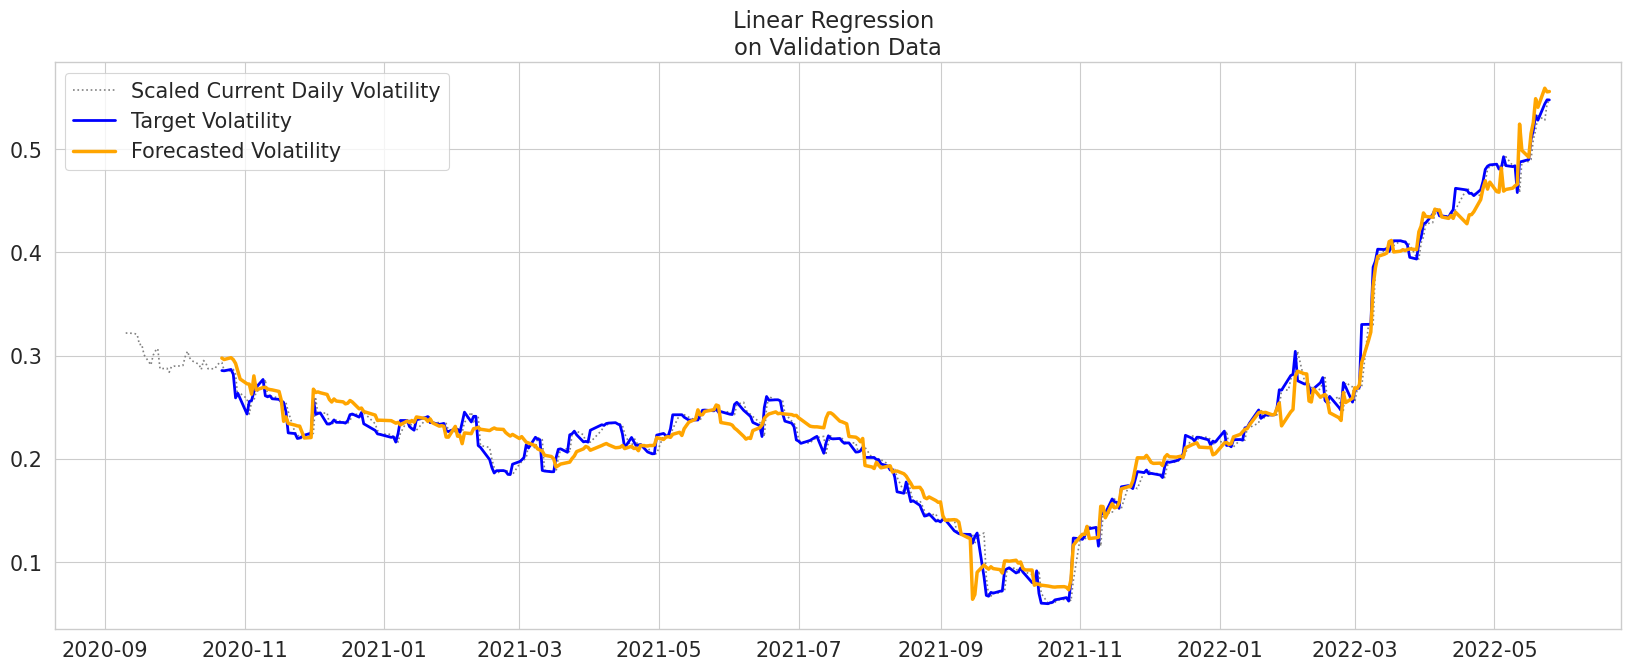

In [ ]:
# Visualize model predictions
viz_model(y_val_scaled_adj, y_val_pred_series, "Linear Regression")

In [ ]:
# Log model performance
log_perf(y_val_scaled_adj, y_val_pred_series, "Linear Regression")

Model  Validation RMSPE  Validation RMSE
0      Mean Baseline          1.534467         0.196596
1  Linear Regression          0.091667         0.015283

### 5.2.3 Random Forest Model

In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Build the Random Forest Model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="auto",
    bootstrap=True,
    random_state=42
)


In [ ]:
# Lists to store predictions and actual values
y_val_pred_scaled = []
y_val_actual_scaled = []

# Rolling 30-day training and predicting
for i in range(30, len(x_val_scaled)):
    # Extract the past 30 days data
    x_train_rolling = x_val_reshaped[i-30:i]
    y_train_rolling = y_val_reshaped[i-30:i]

    # Fit the model on the rolling window
    rf_model.fit(x_train_rolling, y_train_rolling.ravel())  # ravel() is used to convert y_train_rolling to 1D array if needed

    # Predict the next day volatility
    pred = rf_model.predict([x_val_reshaped[i]])

    y_val_pred_scaled.append(pred[0])
    y_val_actual_scaled.append(y_val_reshaped[i])

In [ ]:
# Adjust the index for y_val_pred_series to start from the 31st day
y_val_pred_series = pd.Series(y_val_pred_scaled, index=y_val_scaled.index[30:])

In [ ]:
y_val_scaled_adj =y_val_scaled[30:]

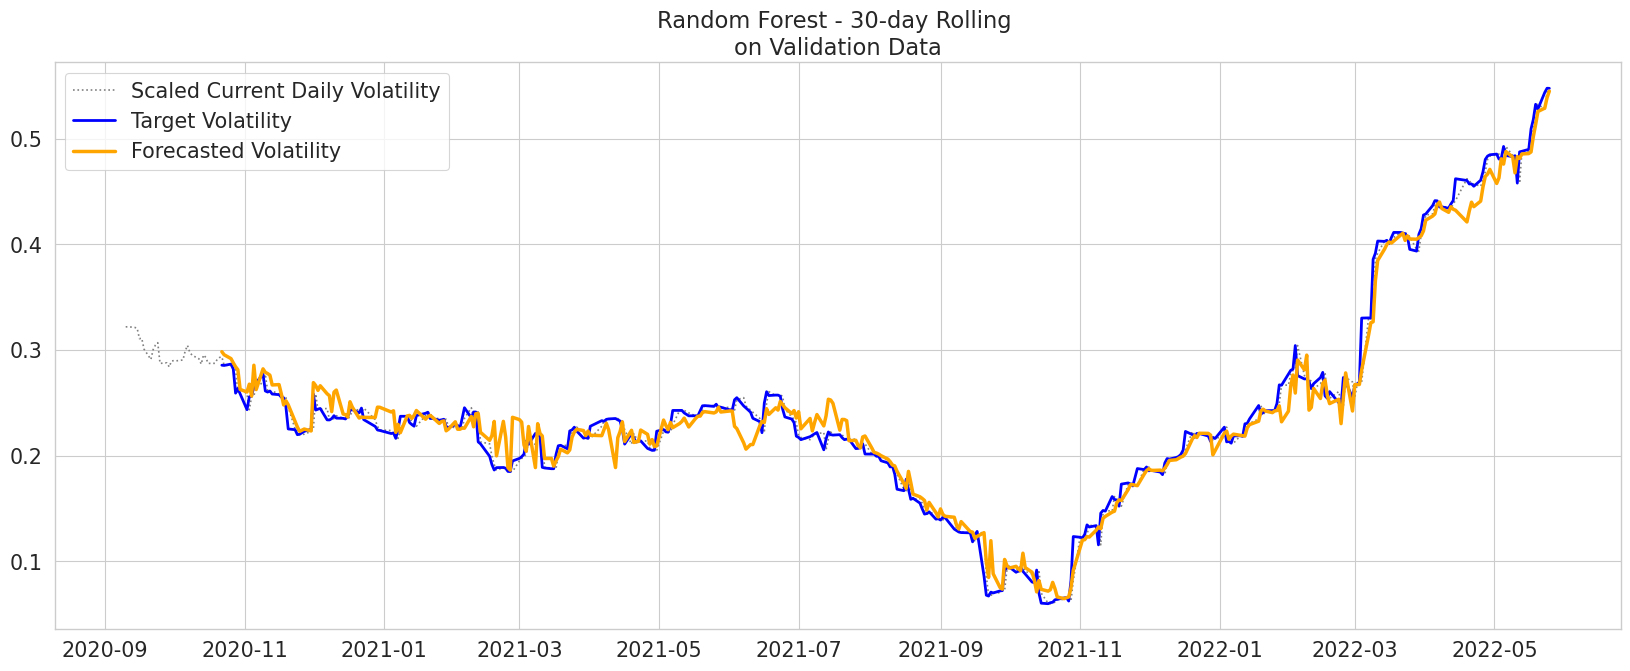

In [ ]:
# Visualize model predictions
viz_model(y_val_scaled_adj, y_val_pred_series, "Random Forest - 30-day Rolling")

In [ ]:
# Log model performance
log_perf(y_val_scaled_adj, y_val_pred_series, "Random Forest - 30-day Rolling")

Model  Validation RMSPE  Validation RMSE
0                   Mean Baseline          1.534467         0.196596
1               Linear Regression          0.091667         0.015283
2  Random Forest - 30-day Rolling          0.086041         0.014813

## 5.3 Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import backend as K
from decimal import Decimal

In [ ]:
# series to matrix dataset
def windowed_dataset(x_series, y_series, lookback_window):
    dataX, dataY = [], []
    for i in range((lookback_window-1), len(x_series)):
        start_idx = x_series.index[i-lookback_window+1]
        end_idx = x_series.index[i]
        a = x_series[start_idx:end_idx].values
        dataX.append(a)
        dataY.append(y_series[end_idx])

    return np.array(dataX), np.array(dataY)

In [ ]:
def rmspe(y_true, y_pred):

    loss = K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

    return loss

In [ ]:
def forecast(model, range_idx):
    start_idx = df3.index[split_1-n_past+1]
    end_idx = range_idx[-1]
    mat_X, _ = windowed_dataset(df3.vol_current[start_idx:end_idx],
                                df3.vol_future[range_idx], n_past)
    preds = pd.Series(model.predict(mat_X)[:, 0],
                      index=range_idx)

    return preds


In [ ]:
def scale(scaler, y_series):
    scaled = pd.Series(scaler.transform(y_series.values.reshape(-1,1))[:, 0],
                       index=y_series.index)
    return scaled

In [ ]:
def viz_train_val_metrics(model_hist):
    with sns.axes_style("white"):
        fig, ax = plt.subplots(figsize=(15,6))

        # plot mean squared error on the left y-axis
        # Training Set
        ln11 = ax.plot(range(len(model_hist.history['loss'])),
                    model_hist.history['loss'], color='lightblue',
                    label='Training MSE', lw=2)
        # Validation Set
        ln12 = ax.plot(range(len(model_hist.history['loss'])),
                    model_hist.history['val_loss'], color='darkblue',
                    label='Validation MSE', lw=2)
        ax.set_xlabel('Epoch')
        ax.set_ylabel('MSE')

        # plot mean squared error on the right  y-axis
        ax2 = ax.twinx()
        ln21 = ax2.plot(range(len(model_hist.history['loss'])),
                    model_hist.history['rmspe'], color='pink', lw=2,
                    label='Training RMSPE')
        ln22 = ax2.plot(range(len(model_hist.history['loss'])),
                    model_hist.history['val_rmspe'], color='red', lw=2,
                    label='Validation RMSPE')
        ax2.set_ylabel('RMSPE')

        # combining labels into single legend
        lns = ln11 + ln12 + ln21 + ln22
        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs, loc='best')

        ax.set_title('Training vs. Validation Learning Curves')
        plt.show();

### 5.3.1 Neural Network Baseline Metrics - Fully Connected Deep Neural Network (DNN)

In [ ]:
# clearing internal variables to prevent models from impacting later versions of themselves
tf.keras.backend.clear_session()
np.random.seed(seed)

n_past = 66
batch_size = 8
layer_dnn_1 = 32

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)

dnn_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[n_past, 1]),
    # Add a Dense layer with {layer_dnn_1} neurons and ReLU activation
    tf.keras.layers.Dense(layer_dnn_1, activation='relu'),
    tf.keras.layers.Dense(1)
])

dnn_1.compile(loss='mse',
              optimizer='adam',
              metrics=[rmspe])

print(dnn_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 66)                0         
                                                                 
 dense (Dense)               (None, 32)                2144      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,177
Trainable params: 2,177
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit model to training dataset
epoch =200
dnn_1_res = dnn_1.fit(mat_X_train, mat_y_train, epochs=epoch,
                      validation_split=0.2,
                      verbose=0, batch_size=batch_size,
                      shuffle=True)

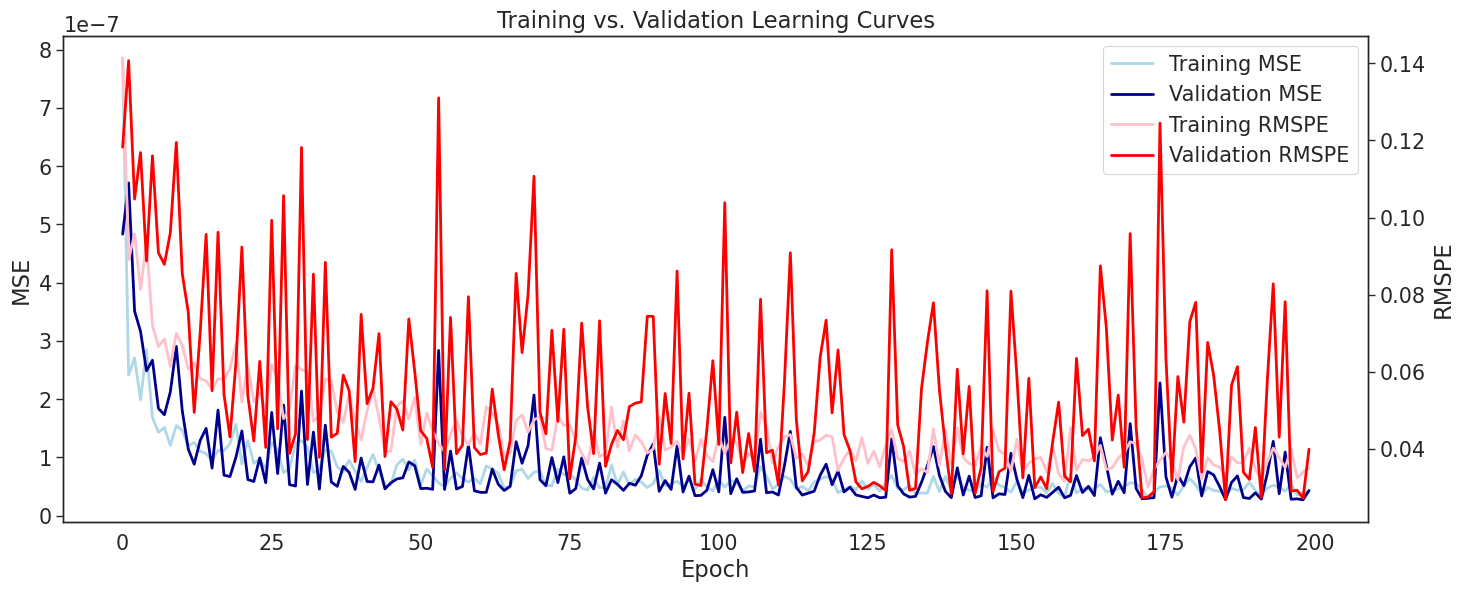

In [ ]:
# Plot the traing validation MSE and RMSPE learning curve
viz_train_val_metrics(dnn_1_res)

In [ ]:
# predict on validation set
dnn_1_preds = forecast(dnn_1, val_idx)

# Minmax Scale the output
dnn_1_preds_scaled = scale(scaler_vol, dnn_1_preds)

14/14 [==============================] - 0s 1ms/step


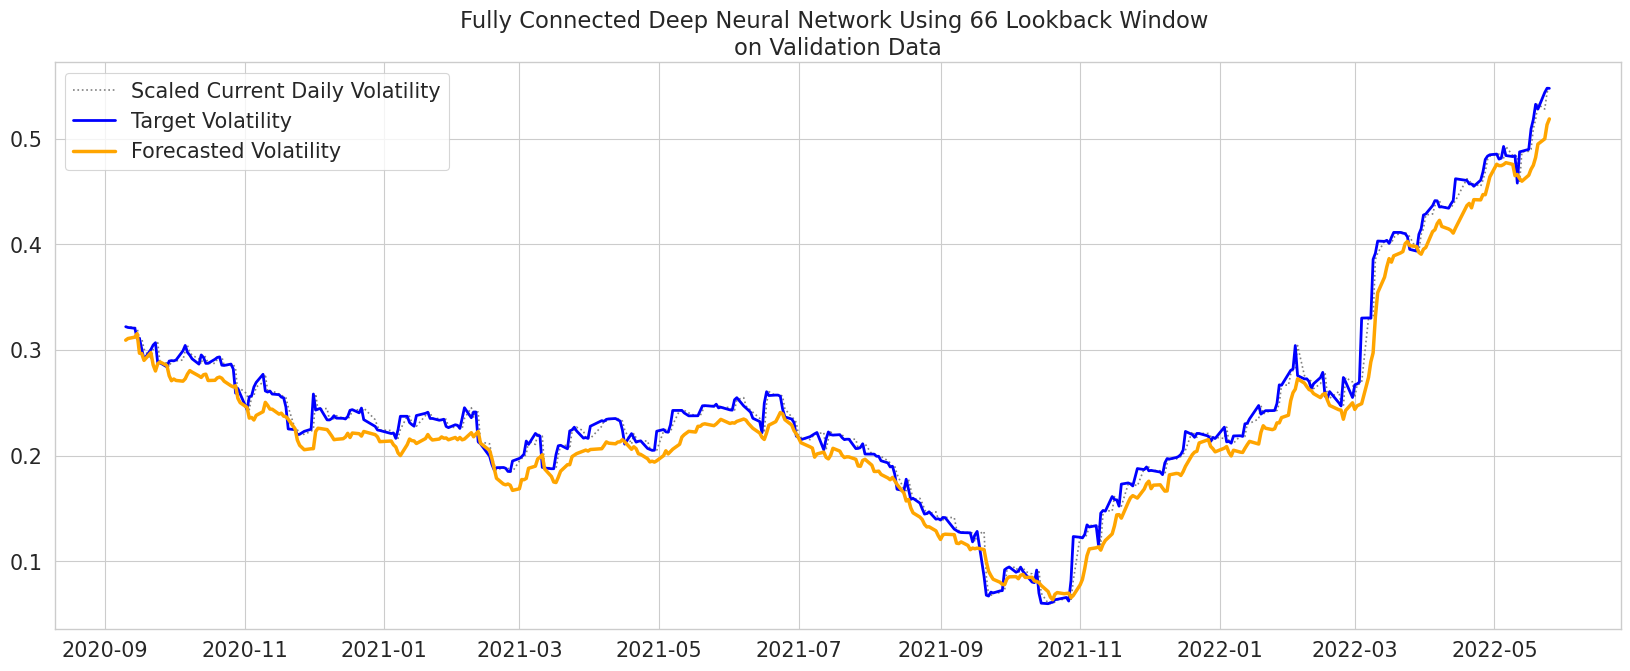

In [ ]:
# plotting predictions vs. target values on validation set
viz_model(y_val_scaled, dnn_1_preds_scaled,
          f"Fully Connected Deep Neural Network Using {n_past} Lookback Window")
# plt.savefig(os.path.join(directory_to_img, 'fully_connected_NN.png'),
#             dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
# add metrics outputs to display reult
log_perf(y_val_scaled, dnn_1_preds_scaled,
         f"FullyConnectedDNN{layer_dnn_1}units,n_past={n_past},epochs={epoch}")

Model  Validation RMSPE  \
0                                  Mean Baseline          1.534467   
1                              Linear Regression          0.091667   
2                 Random Forest - 30-day Rolling          0.086041   
3  FullyConnectedDNN32units,n_past=66,epochs=200          0.097806   

   Validation RMSE  
0         0.196596  
1         0.015283  
2         0.014813  
3         0.020739

### 5.3.2 Univariate Long Short-Term Memory (LSTM)

In [ ]:
tf.keras.backend.clear_session()

np.random.seed(seed)

n_past = 66
batch_size = 8
layer_lstm_1 = 16

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)

lstm_1 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                           input_shape=[None]),
    # First LSTM Layer
    tf.keras.layers.LSTM(layer_lstm_1),
    # Output Layer
    tf.keras.layers.Dense(1)
])

lstm_1.compile(loss='mse',
               optimizer="adam",
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_1.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# Early stop if performance not improving by {patience} epoches
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit model to training dataset
epoch_lstm_1=200
lstm_1_res = lstm_1.fit(mat_X_train, mat_y_train,
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2, shuffle=True,
                        verbose=0, batch_size=batch_size, epochs=epoch_lstm_1)

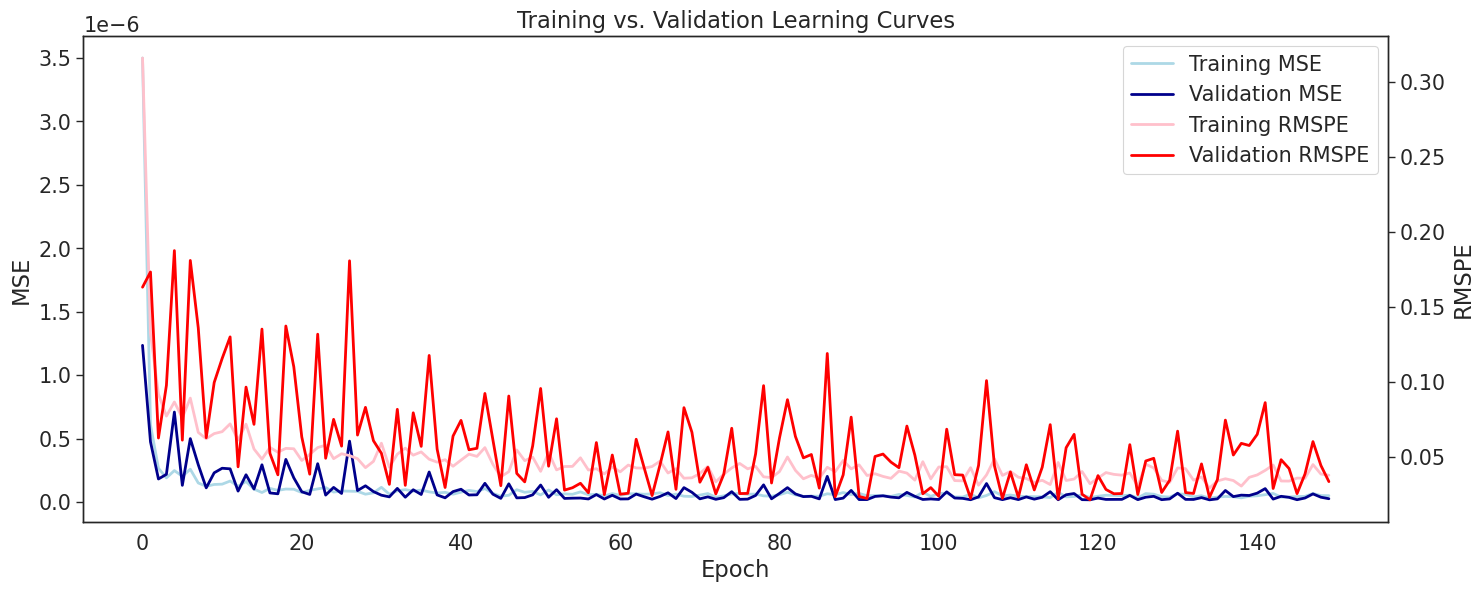

In [ ]:
# Plot the traing validation MSE and RMSPE learning curve
viz_train_val_metrics(lstm_1_res)

In [ ]:
# predict on validation set
lstm_1_preds = forecast(lstm_1, val_idx)

# Minmax Scale the output
lstm_1_preds_scaled = scale(scaler_vol, lstm_1_preds)

14/14 [==============================] - 0s 2ms/step


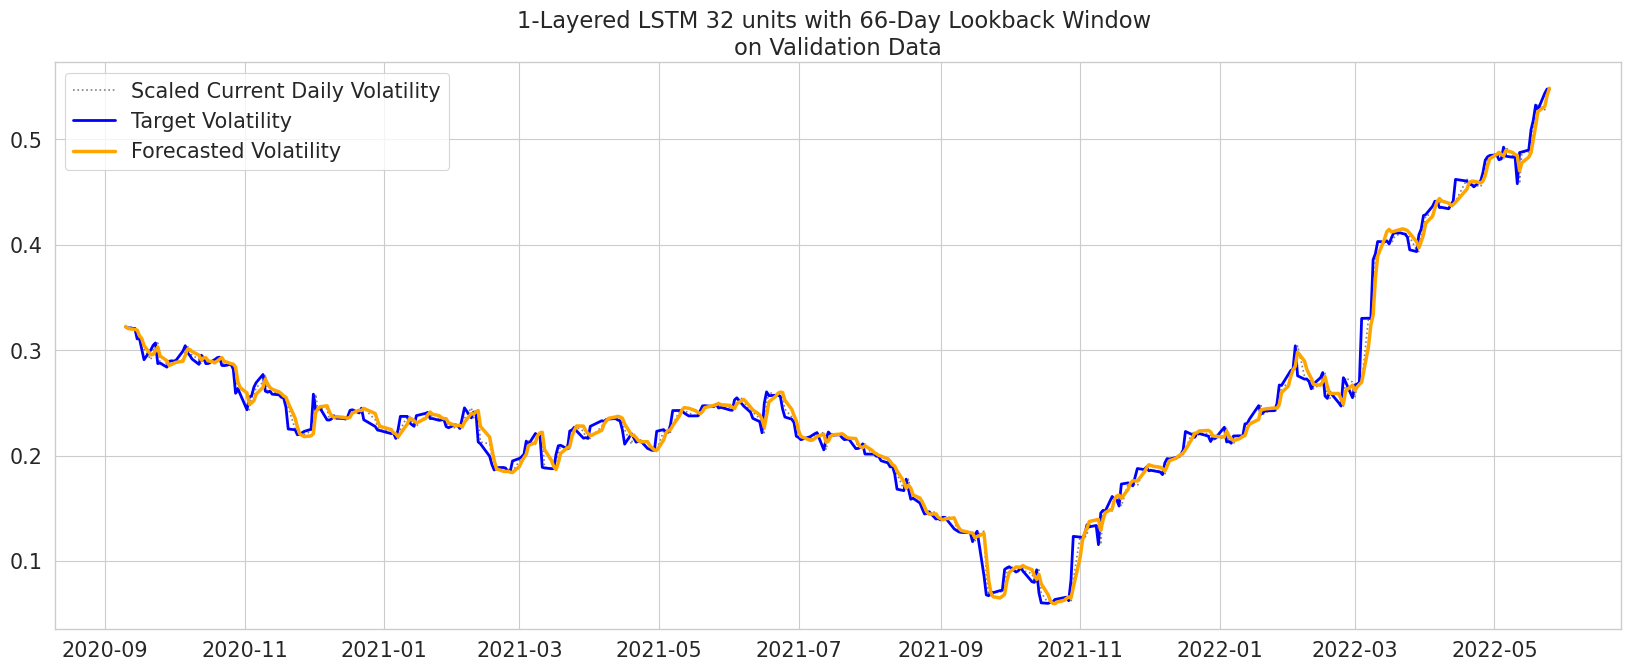

In [ ]:
# target vs prediction plot
viz_model(y_val_scaled, lstm_1_preds_scaled,
          f"1-Layered LSTM {layer_lstm_1} units with {n_past}-Day Lookback Window")
# plt.savefig(os.path.join(directory_to_img, 'lstm_1.png'),
#             dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
# add metrics outputs to display reult
log_perf(y_val_scaled, lstm_1_preds_scaled,
         f"LSTM-1-layer{layer_lstm_1}units,n_past={n_past},epoches={epoch}")

Model  Validation RMSPE  \
0                                  Mean Baseline          1.534467   
1                              Linear Regression          0.091667   
2                 Random Forest - 30-day Rolling          0.086041   
3  FullyConnectedDNN32units,n_past=66,epochs=200          0.097806   
4      LSTM-1-layer32units,n_past=66,epoches=200          0.064171   

   Validation RMSE  
0         0.196596  
1         0.015283  
2         0.014813  
3         0.020739  
4         0.010403

### 5.3.3 Univariate Bidirectional LSTM

In [ ]:
# CLEARING ANY INTERNAL VARIABLES TO PREVENT MODELS
# FROM IMPACTING LATER VERSIONS OF THEMSELVES
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

# INCREASING LOOKBACK WINDOW TO 1 MONTH
n_past = 66
batch_size = 8

layer1_blstm =32
layer2_blstm =16

mat_X_train, mat_y_train = windowed_dataset(x_train, y_train, n_past)

lstm_2 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                           input_shape=[None]),
    # Add 1st Bi-LSTM Layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(layer1_blstm, return_sequences=True)),
    # Add 2nd Bi-LSTM Layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(layer2_blstm)),
    # Output Layer
    tf.keras.layers.Dense(1)
])

lstm_2.compile(loss='mse',
               optimizer="adam",
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_2.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# Early stop if performance not improving by {patience} epoches
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         8704      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 19,105
Trainable params: 19,105
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit model to training dataset
epoch_blstm=200
lstm_2_res = lstm_2.fit(mat_X_train, mat_y_train,
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2, shuffle=True,
                        verbose=0, batch_size=batch_size, epochs=epoch_blstm)

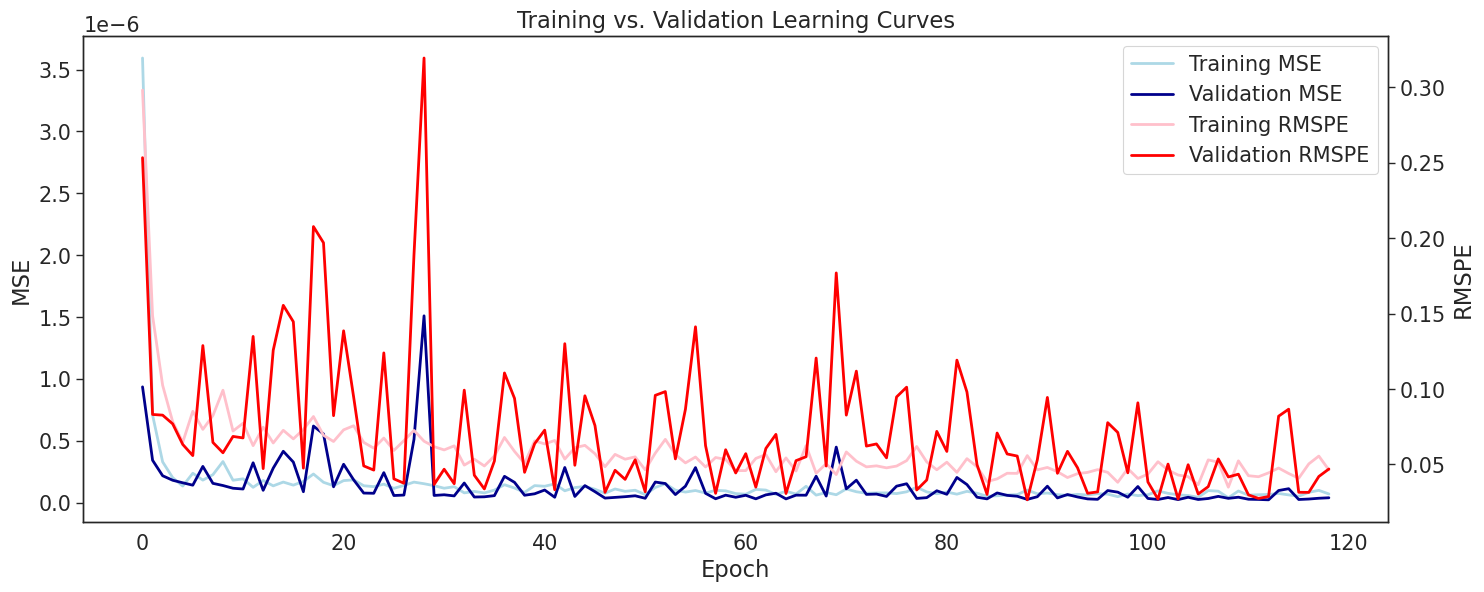

In [ ]:
# Plot the traing validation MSE and RMSPE learning curve
viz_train_val_metrics(lstm_2_res)

In [ ]:
# predict on validation set
lstm_2_preds = forecast(lstm_2, val_idx)

# Minmax Scale the output
lstm_2_preds_scaled = scale(scaler_vol, lstm_2_preds)

14/14 [==============================] - 1s 5ms/step


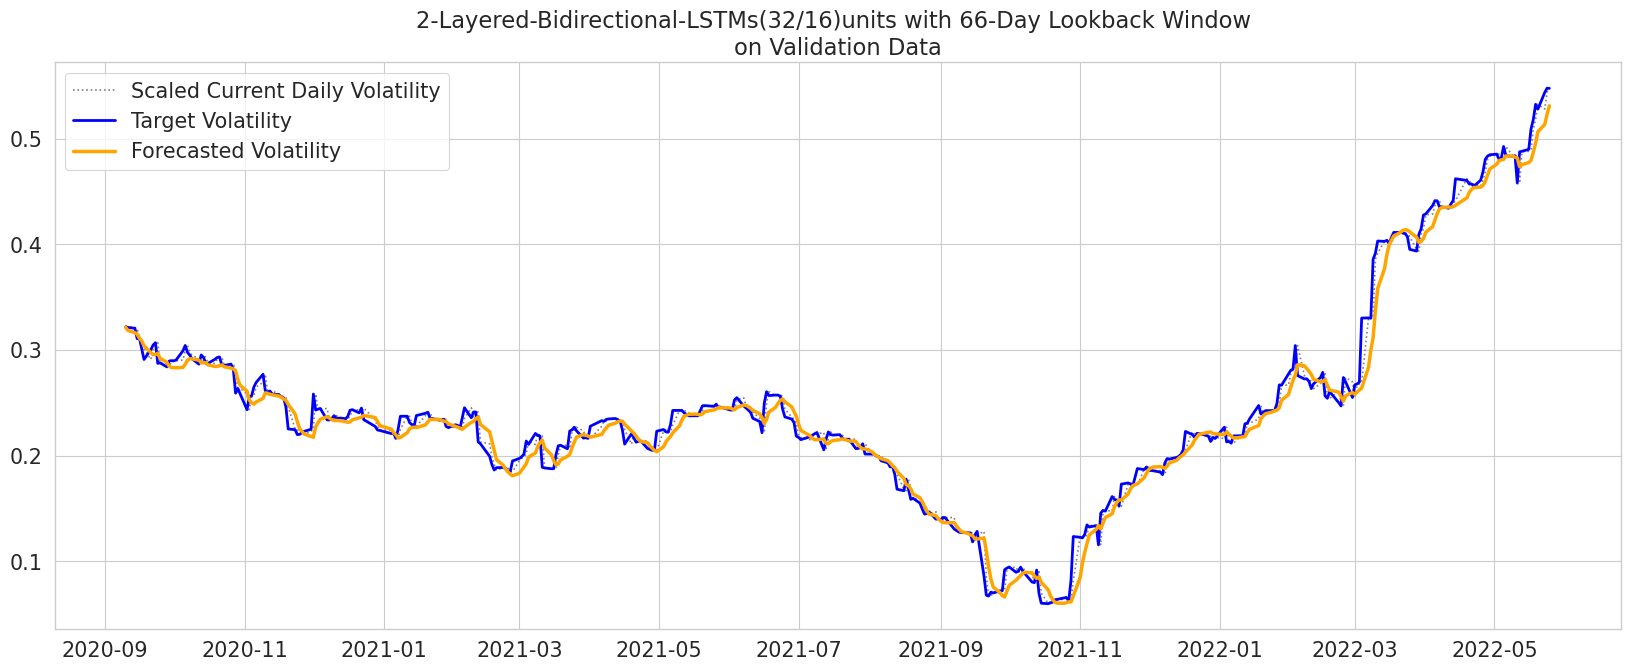

In [ ]:
# target vs prediction plot
viz_model(y_val_scaled, lstm_2_preds_scaled,
          f"2-Layered-Bidirectional-LSTMs({layer1_blstm}/{layer2_blstm})units with {n_past}-Day Lookback Window")
# plt.savefig(os.path.join(directory_to_img, 'lstm_2.png'),
#             dpi=300, bbox_inches='tight')
plt.show();

In [ ]:
# add metrics outputs to display reult
log_perf(y_val_scaled, lstm_2_preds_scaled,
         f"2-layers-Bi-LSTM({layer1_blstm}/{layer2_blstm}units),n_past={n_past},epoches={epoch_blstm}")

Model  Validation RMSPE  \
0                                       Mean Baseline          1.534467   
1                                   Linear Regression          0.091667   
2                      Random Forest - 30-day Rolling          0.086041   
3       FullyConnectedDNN32units,n_past=66,epochs=200          0.097806   
4           LSTM-1-layer32units,n_past=66,epoches=200          0.064171   
5  2-layers-Bi-LSTM(32/16units),n_past=66,epoches=200          0.077072   

   Validation RMSE  
0         0.196596  
1         0.015283  
2         0.014813  
3         0.020739  
4         0.010403  
5         0.013323

### 5.3.4 Multivariate with feature engineering

In [ ]:
df3['HL_sprd'] = np.log((df3[('High', 'EURUSD=X')] - df3[('Low', 'EURUSD=X')]) / df3[('Close', 'EURUSD=X')])
df3['CO_sprd'] = (df3[('Close', 'EURUSD=X')] - df3[('Open', 'EURUSD=X')]) / df3[('Open', 'EURUSD=X')]


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2014-07-21 to 2023-04-05
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, EURUSD=X)    2121 non-null   float64
 1   (Close, ^DJI)        2121 non-null   float64
 2   (Close, ^STOXX50E)   2121 non-null   float64
 3   (Close, ^VIX)        2121 non-null   float64
 4   (High, EURUSD=X)     2121 non-null   float64
 5   (High, ^DJI)         2121 non-null   float64
 6   (High, ^STOXX50E)    2121 non-null   float64
 7   (High, ^VIX)         2121 non-null   float64
 8   (Low, EURUSD=X)      2121 non-null   float64
 9   (Low, ^DJI)          2121 non-null   float64
 10  (Low, ^STOXX50E)     2121 non-null   float64
 11  (Low, ^VIX)          2121 non-null   float64
 12  (Open, EURUSD=X)     2121 non-null   float64
 13  (Open, ^DJI)         2121 non-null   float64
 14  (Open, ^STOXX50E)    2121 non-null   float64
 15  (Open, ^VIX)        

In [ ]:
features = ['HL_sprd', 'CO_sprd', 'vol_current',('Close', '^DJI'),('Close', '^STOXX50E'),
            'EURUSDH3M','EURUSDV3M',('EMA5',''),('MOM5',''),('RSI5',''),('%K5',''),('%D5','')
            ]

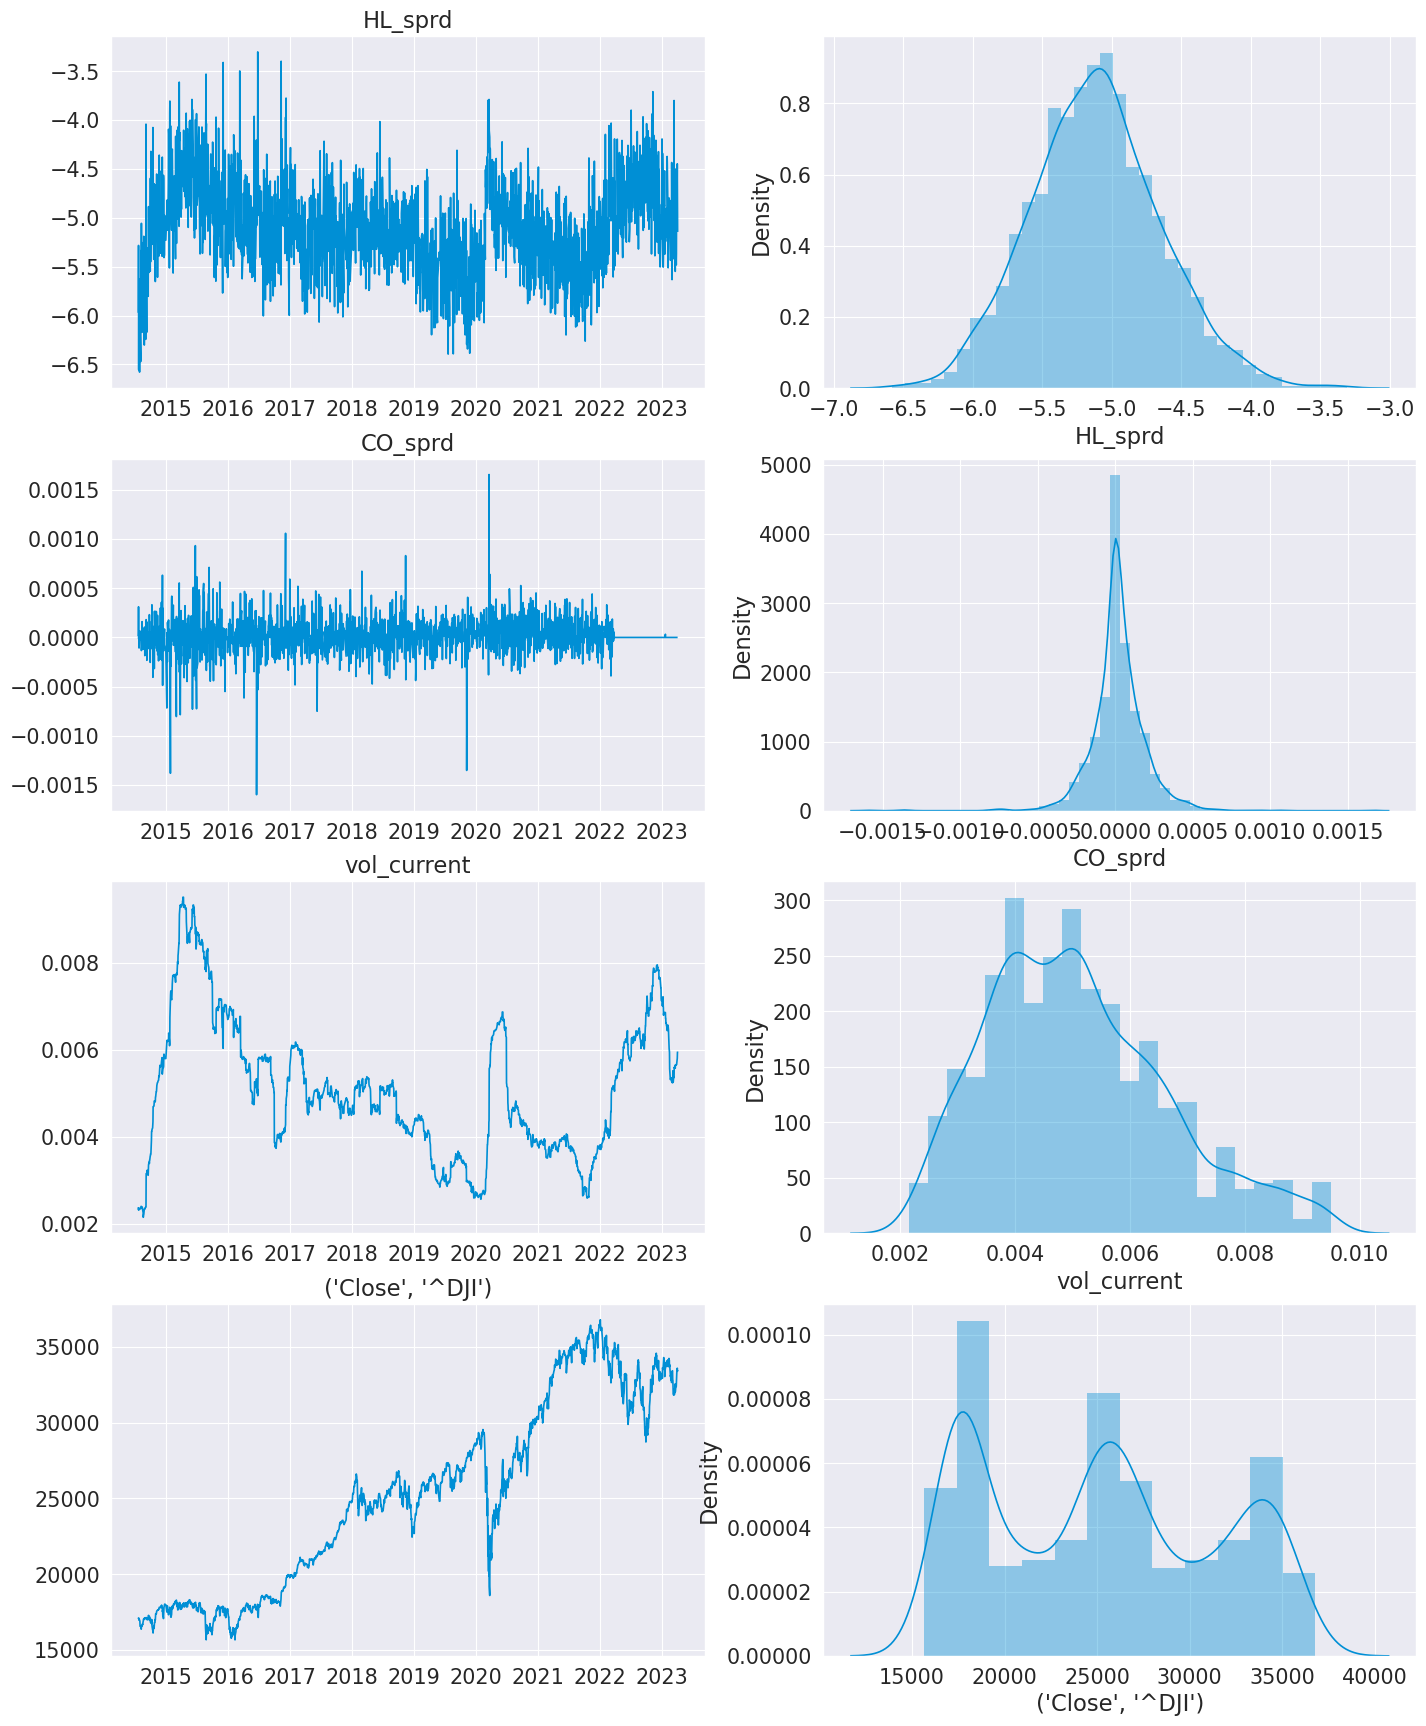

In [ ]:
# PLOT EACH NUMERICAL COLUMN
with sns.axes_style("darkgrid"):
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
for i, c in enumerate(features[:min(len(features), 4)]):
    ax1, ax2 = axes[i][0], axes[i][1]
    ax1.plot(df3[c])
    ax1.set_title(c)

    sns.distplot(df3[c], ax=ax2)


In [ ]:
# PRINT OUT FIRST 5 ROWS OF INPUT DATAFRAME
input_df = df3[features]

# SEPARATE TRAINING INPUT
X_train = input_df.loc[train_idx]

In [ ]:
X_train.head()

HL_sprd   CO_sprd  vol_current  (Close, ^DJI)  \
Date                                                         
2014-07-21 -5.971924  0.000014     0.002386   17051.730469   
2014-07-22 -5.283178  0.000311     0.002321   17113.539062   
2014-07-23 -6.554040 -0.000014     0.002367   17086.630859   
2014-07-24 -5.724858  0.000067     0.002340   17083.800781   
2014-07-25 -5.636687 -0.000108     0.002326   16960.570312   

            (Close, ^STOXX50E)  EURUSDH3M  EURUSDV3M  (EMA5, )  (MOM5, )  \
Date                                                                       
2014-07-21         3137.060059     3.5703     5.1100  1.354947 -0.007161   
2014-07-22         3189.219971     3.6647     5.3500  1.354199 -0.009471   
2014-07-23         3193.129883     3.6602     5.2875  1.351733 -0.010401   
2014-07-24         3220.070068     3.6545     5.2850  1.349920 -0.006703   
2014-07-25         3174.989990     3.6872     5.1225  1.348772 -0.005406   

             (RSI5, )    (%K5, )    (%D5, )  
Date                                         
2014-07-21  30.160362  29.088705  18.630407  
2014-07-22  28.589366  59.240575  35.353739  
2014-07-23  16.338966  12.975031  33.768104  
2014-07-24  15.619381  19.707292  30.640966  
2014-07-25  17.246338  29.740452  20.807592

In [ ]:
y_train.head(20)

Date
2014-07-21    0.002321
2014-07-22    0.002367
2014-07-23    0.002340
2014-07-24    0.002326
2014-07-25    0.002349
2014-07-28    0.002347
2014-07-29    0.002343
2014-07-30    0.002343
2014-07-31    0.002362
2014-08-04    0.002360
2014-08-05    0.002403
2014-08-06    0.002402
2014-08-07    0.002388
2014-08-08    0.002372
2014-08-11    0.002379
2014-08-12    0.002385
2014-08-13    0.002335
2014-08-14    0.002329
2014-08-15    0.002263
2014-08-18    0.002152
Name: vol_future, dtype: float64

In [ ]:
input_df.head()

HL_sprd   CO_sprd  vol_current  (Close, ^DJI)  \
Date                                                         
2014-07-21 -5.971924  0.000014     0.002386   17051.730469   
2014-07-22 -5.283178  0.000311     0.002321   17113.539062   
2014-07-23 -6.554040 -0.000014     0.002367   17086.630859   
2014-07-24 -5.724858  0.000067     0.002340   17083.800781   
2014-07-25 -5.636687 -0.000108     0.002326   16960.570312   

            (Close, ^STOXX50E)  EURUSDH3M  EURUSDV3M  (EMA5, )  (MOM5, )  \
Date                                                                       
2014-07-21         3137.060059     3.5703     5.1100  1.354947 -0.007161   
2014-07-22         3189.219971     3.6647     5.3500  1.354199 -0.009471   
2014-07-23         3193.129883     3.6602     5.2875  1.351733 -0.010401   
2014-07-24         3220.070068     3.6545     5.2850  1.349920 -0.006703   
2014-07-25         3174.989990     3.6872     5.1225  1.348772 -0.005406   

             (RSI5, )    (%K5, )    (%D5, )  
Date                                         
2014-07-21  30.160362  29.088705  18.630407  
2014-07-22  28.589366  59.240575  35.353739  
2014-07-23  16.338966  12.975031  33.768104  
2014-07-24  15.619381  19.707292  30.640966  
2014-07-25  17.246338  29.740452  20.807592

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1484 entries, 2014-07-21 to 2020-09-09
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HL_sprd             1484 non-null   float64
 1   CO_sprd             1484 non-null   float64
 2   vol_current         1484 non-null   float64
 3   (Close, ^DJI)       1484 non-null   float64
 4   (Close, ^STOXX50E)  1484 non-null   float64
 5   EURUSDH3M           1484 non-null   float64
 6   EURUSDV3M           1484 non-null   float64
 7   (EMA5, )            1484 non-null   float64
 8   (MOM5, )            1484 non-null   float64
 9   (RSI5, )            1484 non-null   float64
 10  (%K5, )             1484 non-null   float64
 11  (%D5, )             1484 non-null   float64
dtypes: float64(12)
memory usage: 150.7 KB


In [ ]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2014-07-21 to 2023-04-05
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HL_sprd             2121 non-null   float64
 1   CO_sprd             2121 non-null   float64
 2   vol_current         2121 non-null   float64
 3   (Close, ^DJI)       2121 non-null   float64
 4   (Close, ^STOXX50E)  2121 non-null   float64
 5   EURUSDH3M           2121 non-null   float64
 6   EURUSDV3M           2121 non-null   float64
 7   (EMA5, )            2121 non-null   float64
 8   (MOM5, )            2121 non-null   float64
 9   (RSI5, )            2121 non-null   float64
 10  (%K5, )             2121 non-null   float64
 11  (%D5, )             2121 non-null   float64
dtypes: float64(12)
memory usage: 280.0 KB


In [ ]:
input_df.describe()

HL_sprd      CO_sprd  vol_current  (Close, ^DJI)  \
count  2121.000000  2121.000000  2121.000000    2121.000000   
mean     -5.112223     0.000019     0.005083   25164.827714   
std       0.467750     0.000175     0.001569    6168.896417   
min      -6.578348    -0.001598     0.002152   15660.179688   
25%      -5.420010    -0.000054     0.003905   18392.460938   
50%      -5.115766     0.000000     0.004952   25286.490234   
75%      -4.816007     0.000094     0.006081   30483.130859   
max      -3.303726     0.001655     0.009500   36799.648438   

       (Close, ^STOXX50E)    EURUSDH3M    EURUSDV3M     (EMA5, )     (MOM5, )  \
count         2121.000000  2121.000000  2121.000000  2121.000000  2121.000000   
mean          3480.948802     7.798037     7.848041     1.134582    -0.000701   
std            369.198597     2.415358     1.992071     0.063685     0.012649   
min           2385.820068     3.262500     4.137500     0.970888    -0.053331   
25%           3226.080078     6.092300     6.302500     1.094757    -0.007958   
50%           3455.919922     7.390000     7.490000     1.127534    -0.000900   
75%           3674.939941     9.330100     9.455000     1.177161     0.006895   
max           4401.490234    14.749900    13.095000     1.354947     0.052011   

          (RSI5, )      (%K5, )      (%D5, )  
count  2121.000000  2121.000000  2121.000000  
mean     48.155110    48.544173    48.404542  
std      19.215212    25.708360    19.439598  
min       2.844754    -2.189879     6.485510  
25%      33.781258    26.351098    32.360478  
50%      47.920063    48.347432    48.174863  
75%      62.505054    70.331775    64.545161  
max      95.763543   102.943150    90.773881

In [ ]:
def forecast_multi_hybrid(model, range_idx):
    start_idx = input_df.index[split_1-n_past+1]
    end_idx = range_idx[-1]
    mat_X, _ = windowed_dataset(input_df[start_idx:end_idx],
                                df3.vol_future[range_idx], n_past)
    preds = pd.Series(model.predict(mat_X)[:, 0],
                      index=range_idx)

    return preds

In [ ]:
df3.vol_future[val_idx]

Date
2020-09-10    0.004518
2020-09-11    0.004513
2020-09-14    0.004507
2020-09-15    0.004435
2020-09-16    0.004438
                ...   
2022-05-19    0.006065
2022-05-20    0.006032
2022-05-23    0.006148
2022-05-24    0.006177
2022-05-25    0.006176
Name: vol_future, Length: 424, dtype: float64

### 5.3.5 Multivariate 2-Layered Bidirectional LSTM

In [ ]:
tf.keras.backend.clear_session()

# SET SEED FOR REPRODUCIBILITY
np.random.seed(seed)

n_past = 66
batch_size = 8
n_dims = input_df.shape[1]
layer1_lstm4 =32
layer2_lstm4 =16


mat_X_train, mat_y_train = windowed_dataset(X_train, y_train, n_past)

# CONSTRUCTING MULTIVARIATE BIDIRECTIONAL LSTM NN
lstm_4 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[n_past, n_dims]),
    # normalize,
    # BATCH NORMALIZATION
    tf.keras.layers.BatchNormalization(),
    # ADDING 1st LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(layer1_lstm4, return_sequences=True)),
    # tf.keras.layers.Dropout(0.1),

    # ADDING 2nd LSTM LAYER
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(layer2_lstm4)),
    # tf.keras.layers.Dropout(0.1),

    # DENSE OUTPUT LAYER
    tf.keras.layers.Dense(1)
])

lstm_4.compile(loss='mse',
               optimizer="adam",
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_4.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# Early stop if performance not improving by {patience} epoches
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_4.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 66, 12)           48        
 ormalization)                                                   
                                                                 
 bidirectional (Bidirectiona  (None, 66, 64)           11520     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,969
Trainable params: 21,945
Non-trainable params: 24
___________________________________________________

In [ ]:
# fit model to training dataset
epoch_lstm_4 =200
lstm_4_res = lstm_4.fit(mat_X_train, mat_y_train, epochs=epoch_lstm_4,
                        callbacks=[checkpoint_cb, early_stopping_cb],
                        validation_split=0.2,
                        verbose=0, batch_size=batch_size, shuffle=True)

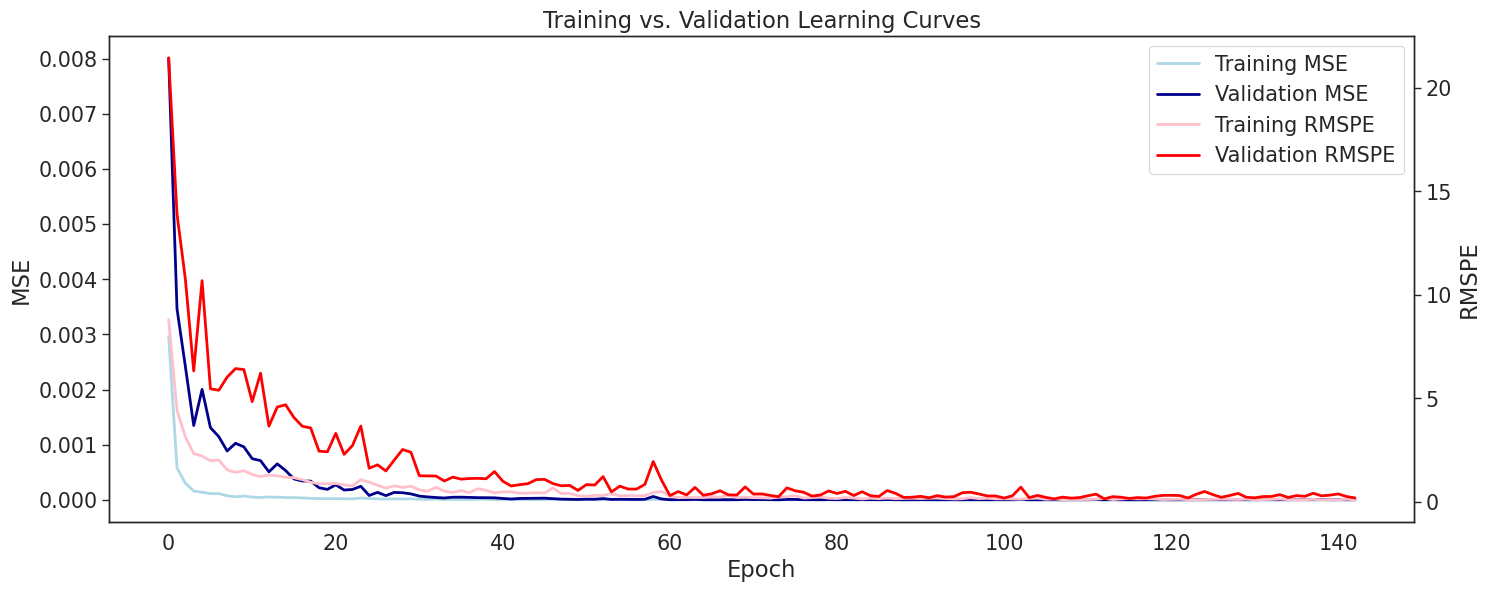

In [ ]:
# Plot the traing validation MSE and RMSPE learning curve
viz_train_val_metrics(lstm_4_res)

In [ ]:
# predict on validation set
lstm_4_preds = forecast_multi_hybrid(lstm_4, val_idx)


14/14 [==============================] - 1s 5ms/step


In [ ]:
# Minmax Scale the output
lstm_4_preds_scaled = scale(scaler_vol, lstm_4_preds)

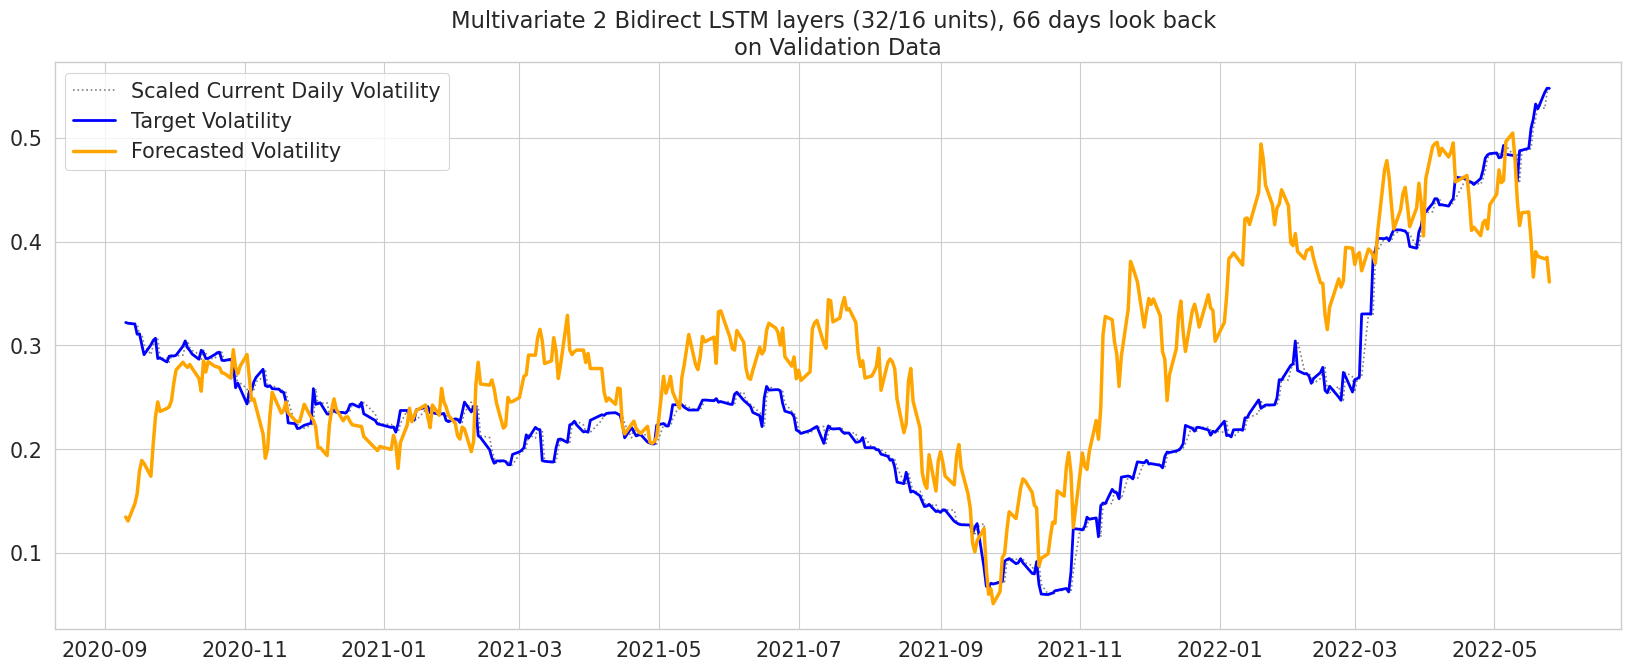

In [ ]:
# target vs prediction plot
viz_model(y_val_scaled, lstm_4_preds_scaled,
          f"Multivariate 2 Bidirect LSTM layers ({layer1_lstm4}/{layer2_lstm4} units), {n_past} days look back")

In [ ]:
# add metrics outputs to display reult
log_perf(y_val_scaled, lstm_4_preds_scaled,
         f"Multivariate-Bi-LSTM 2-layers({layer1_lstm4}/{layer2_lstm4}units),n_past={n_past},batchsize ={batch_size}")

Model  \
0                                                     Mean Baseline   
1                                                 Linear Regression   
2                                    Random Forest - 30-day Rolling   
3                     FullyConnectedDNN32units,n_past=66,epochs=200   
4                         LSTM-1-layer32units,n_past=66,epoches=200   
5                2-layers-Bi-LSTM(32/16units),n_past=66,epoches=200   
6  Multivariate-Bi-LSTM 2-layers(32/16units),n_past=66,batchsize =8   

   Validation RMSPE  Validation RMSE  
0          1.534467         0.196596  
1          0.091667         0.015283  
2          0.086041         0.014813  
3          0.097806         0.020739  
4          0.064171         0.010403  
5          0.077072         0.013323  
6          0.435700         0.082292

# 6.Final Model

## 6.1 Build the final model

In [ ]:
# display the best model using Validation RMSPE using ascending order
perf_df.sort_values(by='Validation RMSPE', ascending=True)

Model  \
4                         LSTM-1-layer32units,n_past=66,epoches=200   
5                2-layers-Bi-LSTM(32/16units),n_past=66,epoches=200   
2                                    Random Forest - 30-day Rolling   
1                                                 Linear Regression   
3                     FullyConnectedDNN32units,n_past=66,epochs=200   
6  Multivariate-Bi-LSTM 2-layers(32/16units),n_past=66,batchsize =8   
0                                                     Mean Baseline   

   Validation RMSPE  Validation RMSE  
4          0.064171         0.010403  
5          0.077072         0.013323  
2          0.086041         0.014813  
1          0.091667         0.015283  
3          0.097806         0.020739  
6          0.435700         0.082292  
0          1.534467         0.196596

So the LSTM-1-Layer is the best performance model on our train-validation set

In [ ]:
# the dataset to combine the training and validation data
trainval_df = df3.vol_current[:split_2]
trainval_y = df3.vol_future[:split_2]

In [ ]:
mat_X_trainval, mat_y_trainval = windowed_dataset(trainval_df, trainval_y, n_past)

### 6.1.1 Hyperpameter Tuning the final model

In [ ]:
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import RandomizedSearchCV

# # Assuming you have n_past and n_dims already defined
# def build_model(lstm_units_1=32, learning_rate=0.001):
#     model = tf.keras.models.Sequential([
    #   tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
    #                        input_shape=[None]),
    #   # First LSTM Layer
    #   tf.keras.layers.LSTM(lstm_units_1),
    #   # Output Layer
    #   tf.keras.layers.Dense(1)
#     ])

#     optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='mse',metrics=[rmspe])

#     return model

# model = KerasRegressor(build_fn=build_model, epochs=200, batch_size=32, verbose=0)

# # Define the hyperparameters and their possible values
# param_dist = {
#     'lstm_units_1': [16, 32，64],
#     'learning_rate': [0.001，0.01],
#     'batch_size': [8，16，32],
#     'epochs': [100,150,200]
# }

# # Random search
# random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=3, verbose=1)
# random_search_results = random_search.fit(mat_X_trainval, mat_y_trainval)

# # Get the best parameters
# print("Best: %f using %s" % (random_search_results.best_score_, random_search_results.best_params_))

# # Grid search
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
# grid_search_results = grid_search.fit(mat_X_trainval, mat_y_trainval)  # Assuming X and Y are your data

# # Get the best parameters
# print("Best: %f using %s" % (grid_search_results.best_score_, grid_search_results.best_params_))

### 6.1.2 Final Model Using Best Parameters

In [ ]:
# the best model chosen using the combined dataset
tf.keras.backend.clear_session()

np.random.seed(seed)

n_past = 66
batch_size = 8
layer1_lstmfinal = 16



lstm_final = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                           input_shape=[None]),
    # First LSTM Layer
    tf.keras.layers.LSTM(layer1_lstmfinal),
    # Output Layer
    tf.keras.layers.Dense(1)
])

# Create an Adam optimizer with a custom learning rate
custom_adam = Adam(learning_rate=0.001)

lstm_final.compile(loss='mse',
               optimizer=custom_adam,
               metrics=[rmspe])

checkpoint_cb = ModelCheckpoint('lstm_final.h5',
                                save_best_only=True,
                                monitor='val_rmspe')

# Early stop if performance not improving by {patience} epoches
early_stopping_cb = EarlyStopping(patience=30,
                                  restore_best_weights=True,
                                  monitor='val_rmspe')

print(lstm_final.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# fit model to training dataset
epochs_final = 300
lstm_final_res = lstm_final.fit(mat_X_trainval, mat_y_trainval, epochs=epochs_final,
                                validation_split=0.2,
                                callbacks=[checkpoint_cb, early_stopping_cb],
                                verbose=0, batch_size=batch_size, shuffle=True)

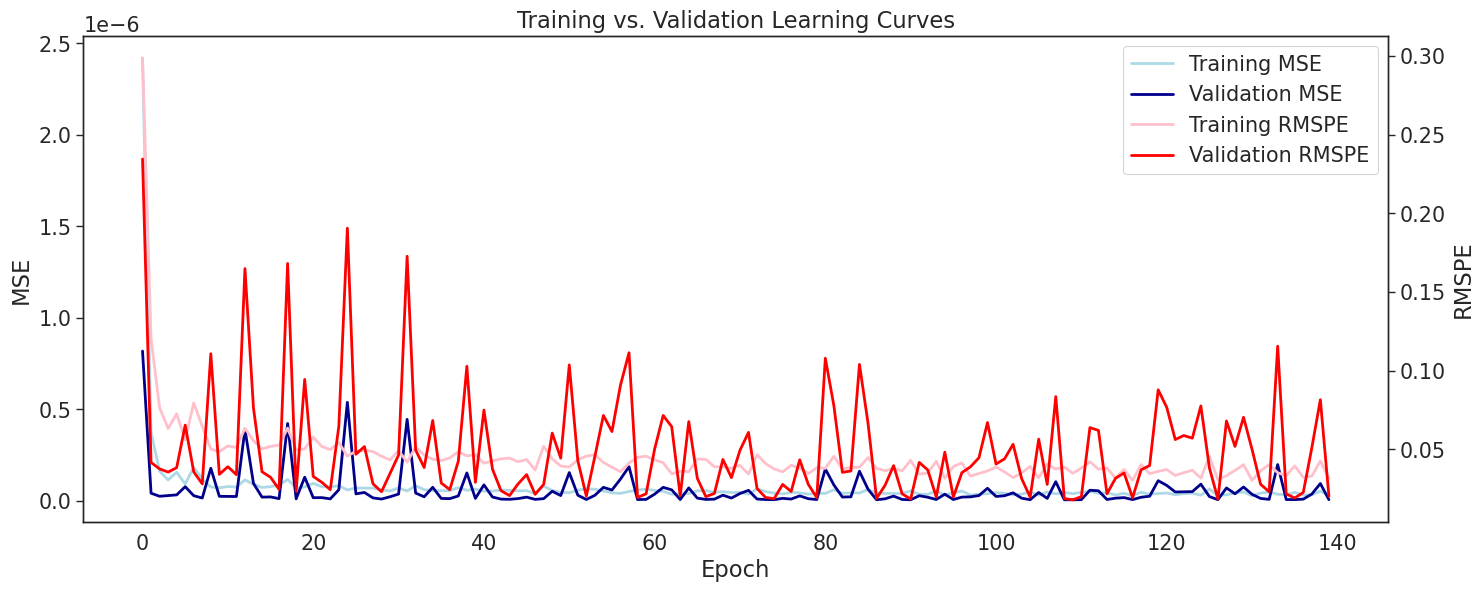

In [ ]:
# Plot the traing validation MSE and RMSPE learning curve
viz_train_val_metrics(lstm_final_res)

## 6.2 Test the final model on Test Dataset

In [ ]:
def forecast_final(model, range_idx):
    start_idx = df3.index[split_2-n_past+1]
    end_idx = range_idx[-1]
    mat_X, _ = windowed_dataset(df3.vol_current[start_idx:end_idx],
                                df3.vol_future[range_idx], n_past)
    preds = pd.Series(model.predict(mat_X)[:, 0],
                      index=range_idx)

    return preds

In [ ]:
# Prediction on Test set
y_test_preds = forecast_final(lstm_final, test_idx)

7/7 [==============================] - 0s 3ms/step


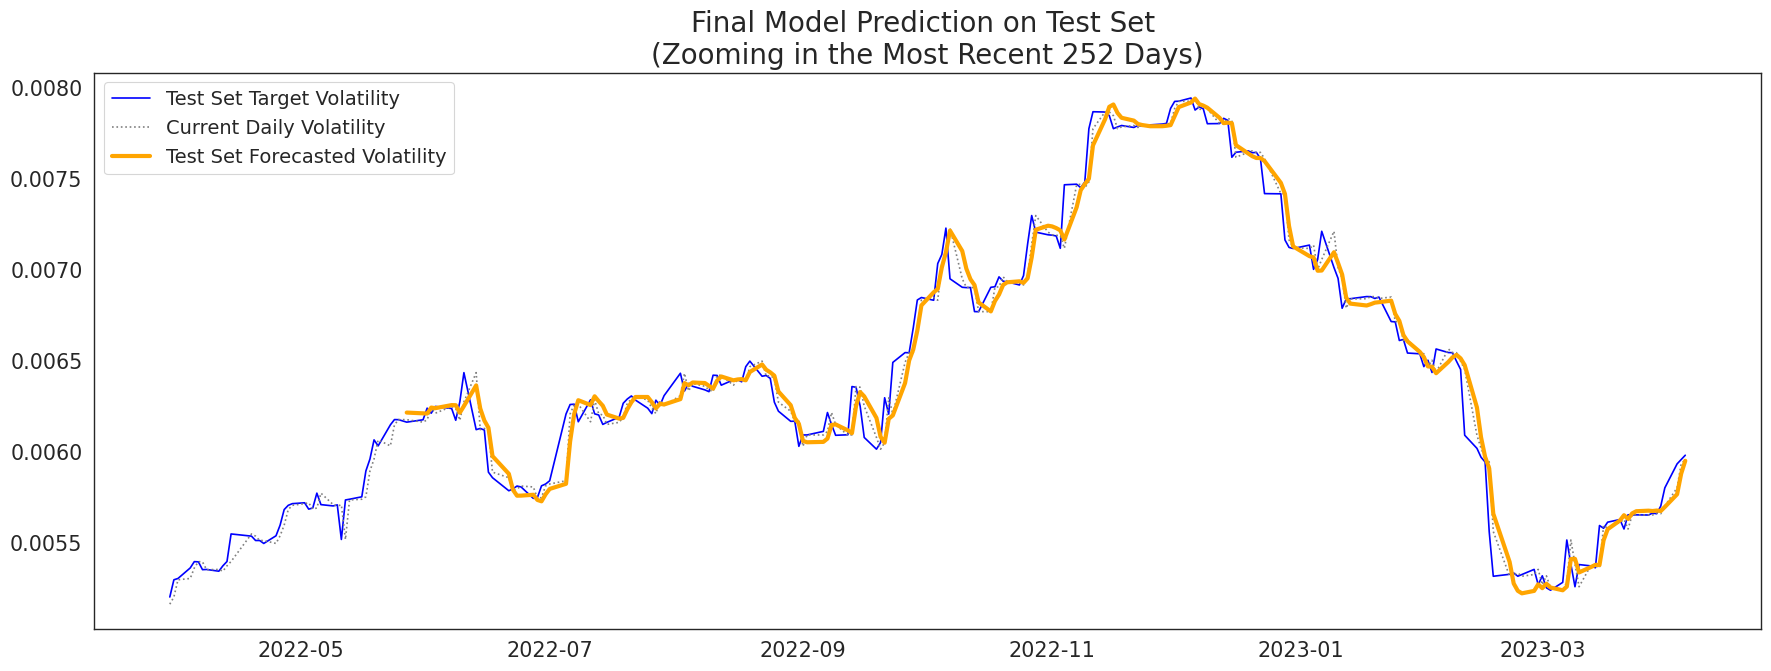

In [ ]:
with sns.axes_style("white"):
    fig, ax1 = plt.subplots(figsize=(18,7))
    # ZOOMING IN THE LAST n_display VALUES
    n_display = 252

    ax1.plot(df3.vol_future[-n_display:], color='blue',
                label=f"Test Set Target Volatility")
    ax1.plot(df3.vol_current[-n_display:], color='gray',  ls=':',
                label=f"Current Daily Volatility")
    ax1.plot(y_test_preds, color='orange', lw=3,
                label=f'Test Set Forecasted Volatility')


    plt.title(f'Final Model Prediction on Test Set \n(Zooming in the Most Recent {n_display} Days)', fontsize=20)
    ax1.legend(loc='upper left', prop={'size': 14})
    plt.tight_layout()

    plt.show();

## 6.3 Final Result on Test dataset

In [ ]:
print('RMSPE on Test Set:', RMSPE(y_test, y_test_preds))

RMSPE on Test Set: 0.017578666438691732


RMSPE on Test Set: 0.01682451775644055

In [ ]:
1-RMSPE(y_test, y_test_preds)

0.9824213335613082